In [1]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

from sklearn.preprocessing import MinMaxScaler
from scipy.signal import find_peaks
from torchviz import make_dot
from tqdm import tqdm

import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch

import matplotlib.pyplot as plt
import datetime
import pickle
import gzip

np.random.seed(datetime.datetime.now().microsecond)

PEAK_THRESHOLD = 390
DATA_PATH = "./data/exported/30sec/"

# Data Load

## Sitting

In [2]:
# Sitting data load
with gzip.open(DATA_PATH + "sitting_ecg.pkl", "rb") as f:
    sitting_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "sitting_acc.pkl", "rb") as f:
    sitting_acc = pickle.load(f)
sitting_acc = sitting_acc - np.mean(sitting_acc)

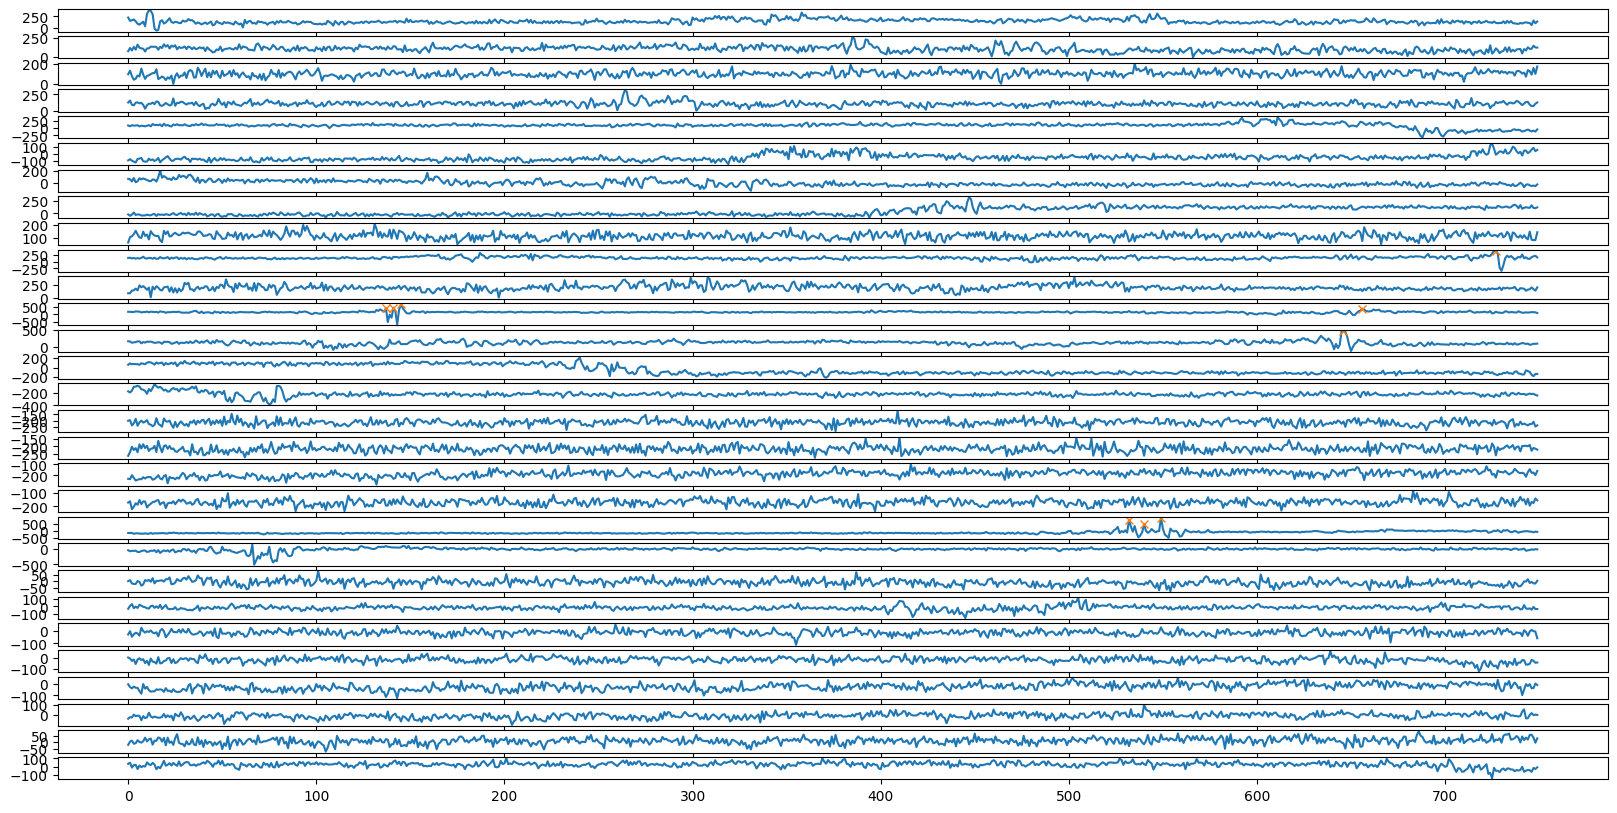

In [3]:
fig, ax = plt.subplots(len(sitting_acc), 1, figsize=(20, 10))
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(sitting_acc[idx])
    ax[idx].plot(peaks, sitting_acc[idx][peaks], "x")
plt.show()

In [4]:
peak_list = list()
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_sitting = sitting_ecg
y_sitting = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_2277/2995813941.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if peaks == []:
/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_2277/2995813941.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


## Walking

In [5]:
# Walking data load
with gzip.open(DATA_PATH + "walking_ecg.pkl", "rb") as f:
    walking_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "walking_acc.pkl", "rb") as f:
    walking_acc = pickle.load(f)
walking_acc = walking_acc - np.mean(walking_acc)

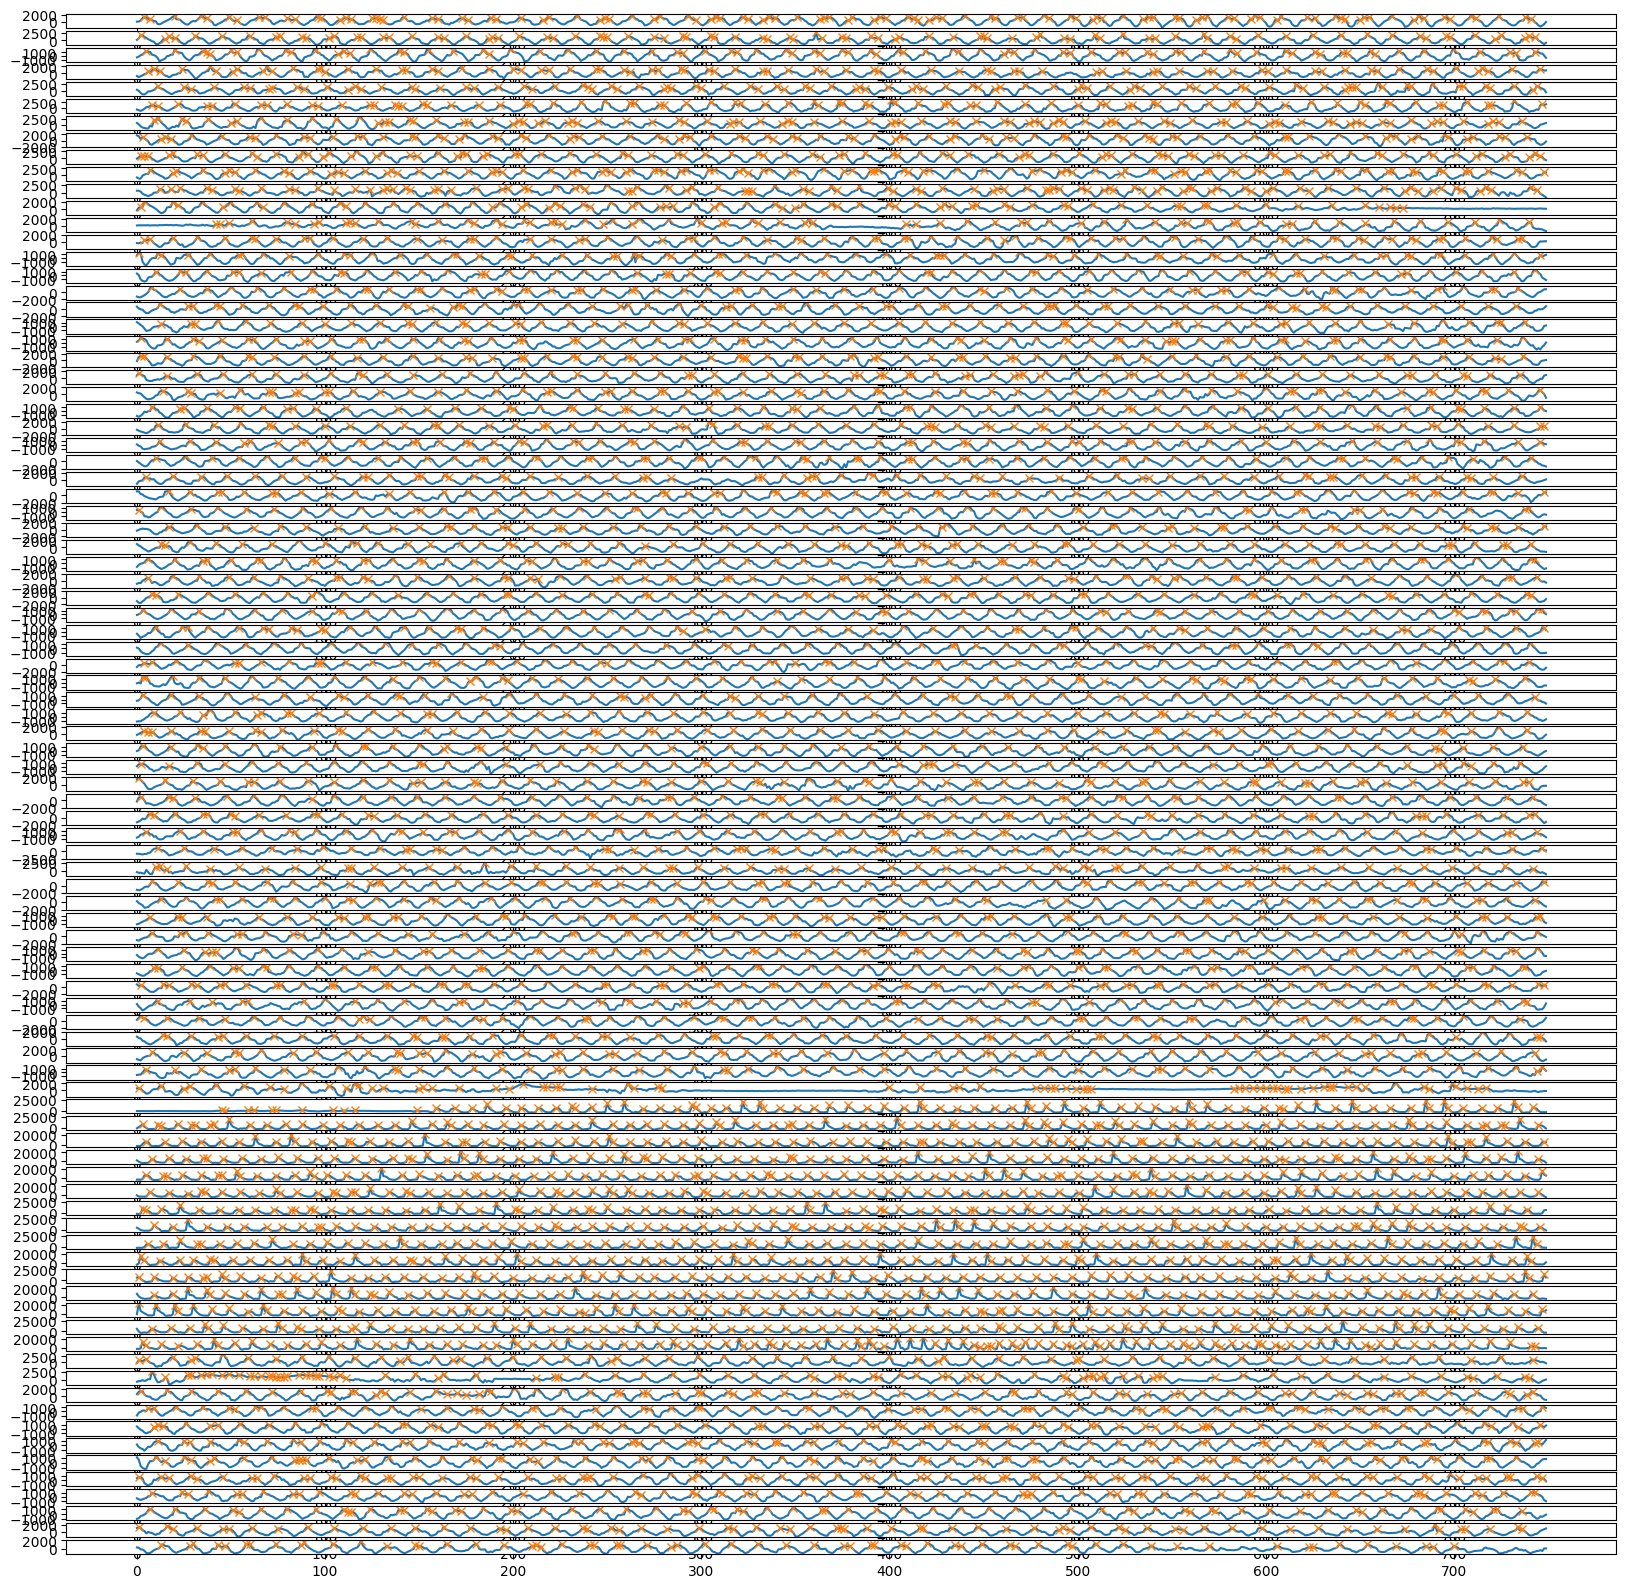

In [6]:
fig, ax = plt.subplots(len(walking_acc), 1, figsize=(20, 20))
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(walking_acc[idx])
    ax[idx].plot(peaks, walking_acc[idx][peaks], "x")
plt.show()

In [7]:
peak_list = list()
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_walking = walking_ecg
y_walking = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_2277/4260280322.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


In [8]:
print(y_walking)

[109, 87, 79, 81, 90, 80, 91, 88, 91, 98, 98, 73, 70, 73, 70, 66, 68, 69, 60, 69, 69, 64, 66, 60, 66, 66, 66, 64, 65, 58, 62, 63, 65, 68, 64, 60, 61, 58, 61, 59, 58, 58, 60, 56, 58, 64, 59, 66, 60, 65, 61, 65, 62, 68, 65, 70, 67, 76, 62, 65, 64, 64, 58, 71, 85, 94, 87, 88, 89, 87, 85, 88, 87, 89, 87, 85, 91, 88, 107, 59, 85, 77, 76, 78, 77, 78, 84, 73, 68, 67, 63]


## Running

In [9]:
# Running data load
with gzip.open(DATA_PATH + "running_ecg.pkl", "rb") as f:
    running_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "running_acc.pkl", "rb") as f:
    running_acc = pickle.load(f)
running_acc = running_acc - np.mean(running_acc)

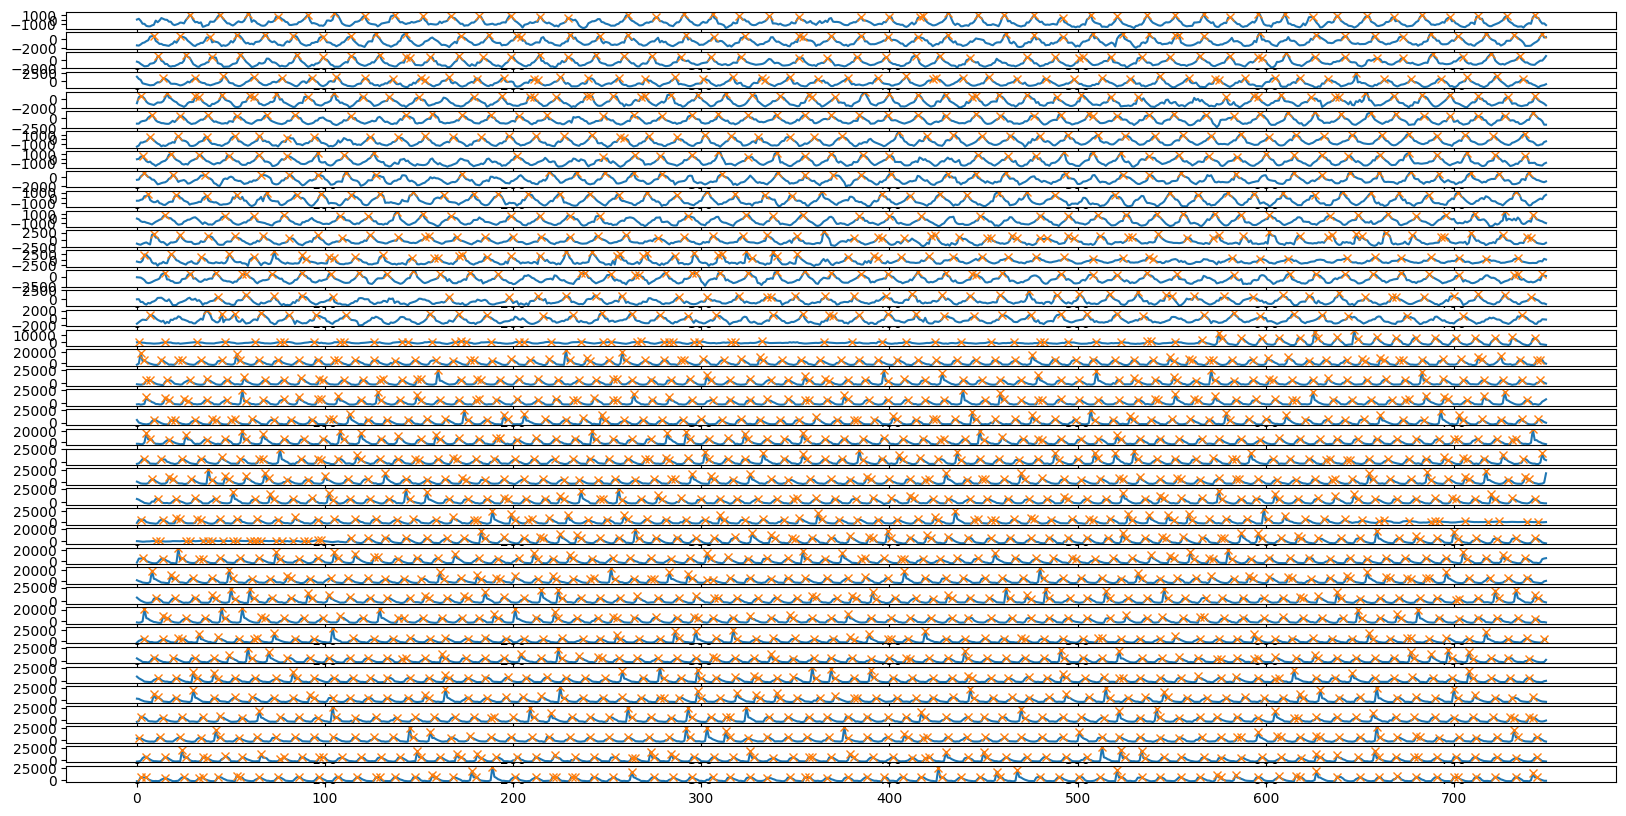

In [10]:
fig, ax = plt.subplots(len(running_acc), 1, figsize=(20, 10))
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(running_acc[idx])
    ax[idx].plot(peaks, running_acc[idx][peaks], "x")
plt.show()

In [11]:
peak_list = list()
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_running = running_ecg
y_running = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_2277/2482152495.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


# X, y data Split

In [12]:
BATCH_SIZE = 1

In [13]:
X = np.concatenate((X_walking, X_running))
y = np.concatenate((y_walking, y_running))

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(f"""X shape: {X.shape}
y shape: {y.shape}""")

X shape: (130, 7500)
y shape: (130,)


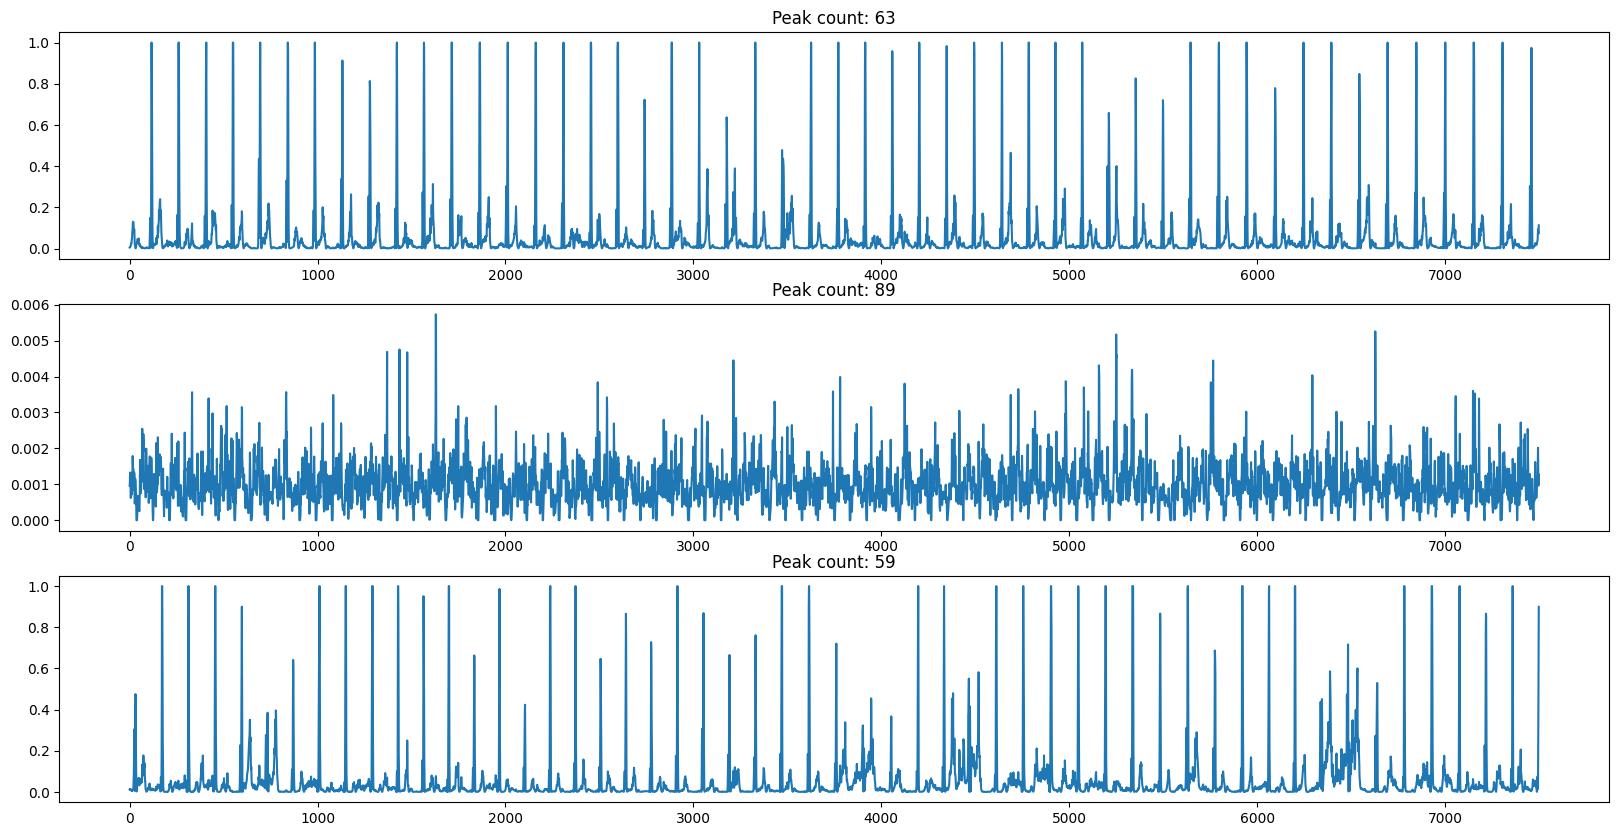

In [14]:
plotting_idx = np.random.randint(0, len(X), 3)

# Plotting the data
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

for idx in range(3):
    ax[idx].plot(X[plotting_idx[idx]])
    ax[idx].set_title(f"Peak count: {y[plotting_idx[idx]]}")
plt.show()


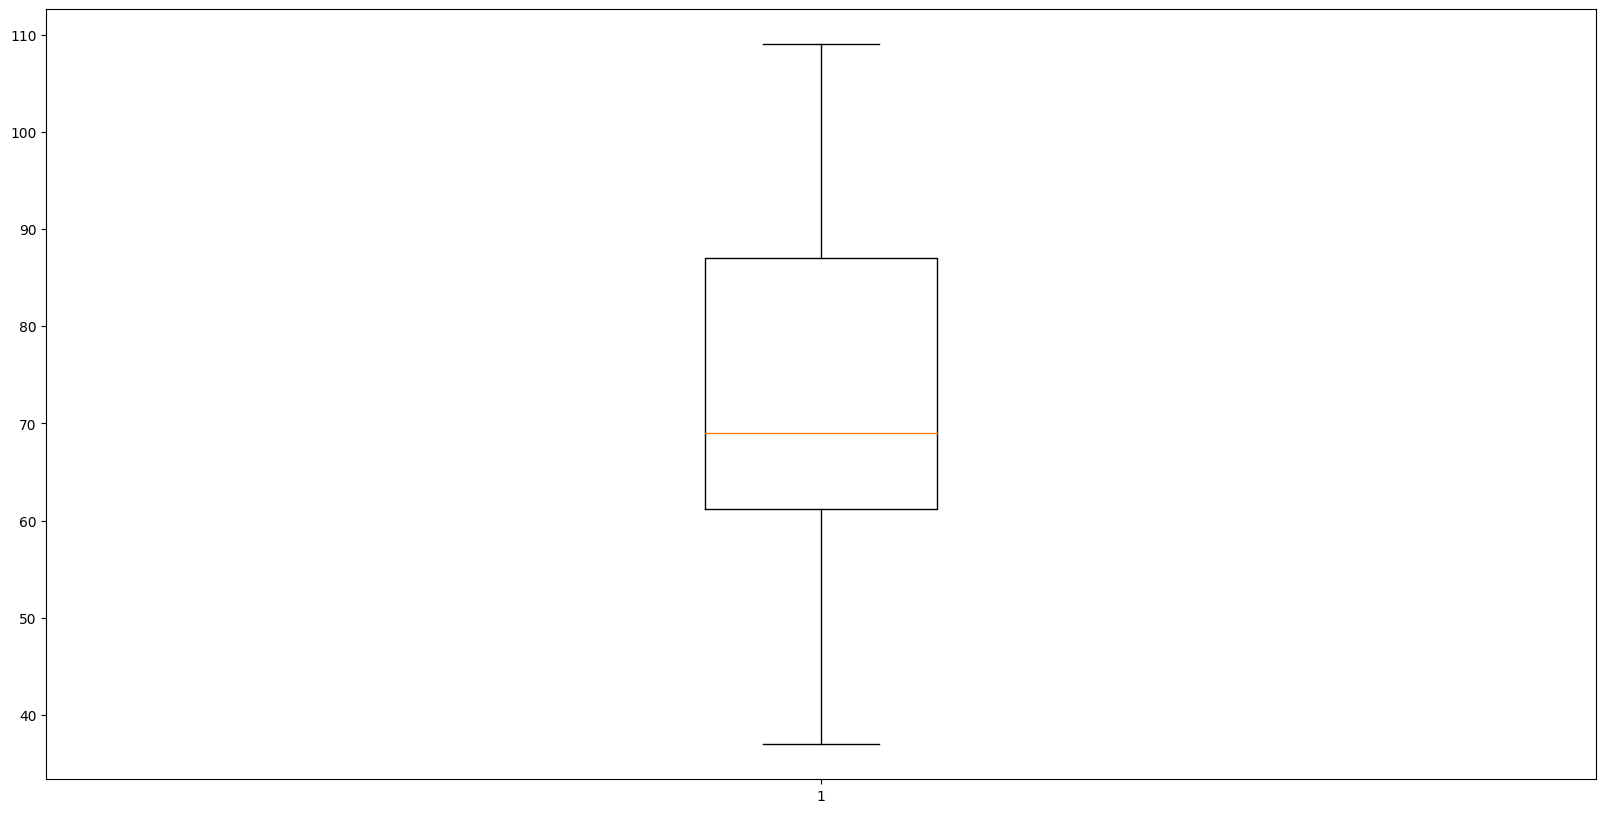

In [15]:
plt.figure(figsize=(20, 10))
plt.boxplot(y)
plt.show()

In [16]:
with gzip.open('./data//exported/X.pkl', 'wb') as f:
    pickle.dump(X, f)

with gzip.open('./data//exported/y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [17]:
with gzip.open('./data//exported/X.pkl', 'rb') as f:
    X = pickle.load(f)

with gzip.open('./data//exported/y.pkl', 'rb') as f:
    y = pickle.load(f)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=datetime.datetime.now().microsecond)

print(f"""X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}""")

X_train shape: (104, 7500)
y_train shape: (104,)
X_test shape: (26, 7500)
y_test shape: (26,)


In [18]:
class ECGDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = np.array(X).astype(np.float32)
        self.y = np.array(y).astype(np.float32)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        return X, y

    def __len__(self):
        return len(self.X)
    
train_dataset = ECGDataset(X_train, y_train)
test_dataset = ECGDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Model

In [19]:
device = torch.device("mps")
EPOCH = 800
MODEL_SAVE_PATH = "./model/"

In [20]:
class NASModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NASModel, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout1 = nn.Dropout(0.65)
        self.fc1 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.fc1(x[:, -1, :])
        x = self.dropout1(x)
        x = x.view(1, self.output_size, -1)

        return x

In [21]:
model = NASModel(7500, 128, 32)
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [22]:
X_train.shape

(104, 7500)

In [23]:
print(model)

NASModel(
  (lstm1): LSTM(7500, 128, batch_first=True)
  (dropout1): Dropout(p=0.65, inplace=False)
  (fc1): Linear(in_features=128, out_features=32, bias=True)
)


# Model Train

In [24]:
model.train()

train_loss, val_loss = [], []
for epoch in range(EPOCH):
    running_loss = 0.0
    for i, data in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        inputs, labels = data
        inputs = inputs.reshape(-1, 1, 7500).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = torch.mean(model(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss.append(running_loss / len(train_dataloader))

    model.eval()
    with torch.no_grad():
        running_loss = 0.0
        for i, data in enumerate(test_dataloader):
            inputs, labels = data
            inputs = inputs.unsqueeze(1).to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

        val_loss.append(running_loss / len(test_dataloader))
    
    print(f"Epoch: {epoch + 1} / {EPOCH} | Train loss: {train_loss[-1]:.5f} | Val loss: {val_loss[-1]:.5f}")
    
    # Model save
    # if val_loss[-1] == min(val_loss):
    #     torch.save(model.state_dict(), MODEL_SAVE_PATH + f"model_{epoch + 1}_{val_loss[-1]:.5f}.pth")
    #     print(f"Model saved at Epoch: {epoch + 1}, Val loss: {val_loss[-1]:.5f}")

    model.train()

  0%|          | 0/104 [00:00<?, ?it/s]

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 104/104 [00:01<00:00, 56.95it/s]
/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 / 800 | Train loss: 4803.26259 | Val loss: 3527.12113


100%|██████████| 104/104 [00:01<00:00, 97.55it/s]


Epoch: 2 / 800 | Train loss: 2854.28289 | Val loss: 1840.65135


100%|██████████| 104/104 [00:01<00:00, 95.75it/s]


Epoch: 3 / 800 | Train loss: 1586.52955 | Val loss: 937.82103


100%|██████████| 104/104 [00:01<00:00, 98.44it/s]


Epoch: 4 / 800 | Train loss: 931.86528 | Val loss: 515.01822


100%|██████████| 104/104 [00:01<00:00, 97.94it/s]


Epoch: 5 / 800 | Train loss: 705.29305 | Val loss: 325.40229


100%|██████████| 104/104 [00:01<00:00, 97.50it/s]


Epoch: 6 / 800 | Train loss: 575.78284 | Val loss: 245.73083


100%|██████████| 104/104 [00:01<00:00, 98.32it/s]


Epoch: 7 / 800 | Train loss: 467.17367 | Val loss: 219.99876


100%|██████████| 104/104 [00:01<00:00, 97.51it/s]


Epoch: 8 / 800 | Train loss: 532.93476 | Val loss: 217.27196


100%|██████████| 104/104 [00:01<00:00, 97.53it/s]


Epoch: 9 / 800 | Train loss: 498.60840 | Val loss: 216.30321


100%|██████████| 104/104 [00:01<00:00, 97.34it/s]


Epoch: 10 / 800 | Train loss: 510.24358 | Val loss: 215.15465


100%|██████████| 104/104 [00:01<00:00, 97.43it/s]


Epoch: 11 / 800 | Train loss: 620.77576 | Val loss: 218.30642


100%|██████████| 104/104 [00:01<00:00, 97.21it/s]


Epoch: 12 / 800 | Train loss: 570.46923 | Val loss: 217.29520


100%|██████████| 104/104 [00:01<00:00, 95.29it/s]


Epoch: 13 / 800 | Train loss: 539.90947 | Val loss: 219.35567


100%|██████████| 104/104 [00:01<00:00, 97.76it/s]


Epoch: 14 / 800 | Train loss: 463.12187 | Val loss: 217.62033


100%|██████████| 104/104 [00:01<00:00, 95.06it/s]


Epoch: 15 / 800 | Train loss: 424.40235 | Val loss: 220.81582


100%|██████████| 104/104 [00:01<00:00, 95.24it/s]


Epoch: 16 / 800 | Train loss: 540.79038 | Val loss: 224.66849


100%|██████████| 104/104 [00:01<00:00, 65.76it/s]


Epoch: 17 / 800 | Train loss: 561.57538 | Val loss: 224.44353


100%|██████████| 104/104 [00:01<00:00, 55.90it/s]


Epoch: 18 / 800 | Train loss: 556.84711 | Val loss: 223.62602


100%|██████████| 104/104 [00:01<00:00, 62.66it/s]


Epoch: 19 / 800 | Train loss: 532.15394 | Val loss: 223.05559


100%|██████████| 104/104 [00:01<00:00, 69.21it/s]


Epoch: 20 / 800 | Train loss: 572.25689 | Val loss: 220.21317


100%|██████████| 104/104 [00:01<00:00, 78.62it/s]


Epoch: 21 / 800 | Train loss: 543.29052 | Val loss: 224.33712


100%|██████████| 104/104 [00:01<00:00, 73.32it/s]


Epoch: 22 / 800 | Train loss: 600.24481 | Val loss: 225.37721


100%|██████████| 104/104 [00:01<00:00, 66.52it/s]


Epoch: 23 / 800 | Train loss: 472.29986 | Val loss: 227.48953


100%|██████████| 104/104 [00:01<00:00, 96.21it/s]


Epoch: 24 / 800 | Train loss: 486.14261 | Val loss: 227.73018


100%|██████████| 104/104 [00:01<00:00, 94.45it/s]


Epoch: 25 / 800 | Train loss: 510.29384 | Val loss: 231.57640


100%|██████████| 104/104 [00:01<00:00, 96.01it/s]


Epoch: 26 / 800 | Train loss: 505.48816 | Val loss: 227.55746


100%|██████████| 104/104 [00:01<00:00, 95.81it/s]


Epoch: 27 / 800 | Train loss: 608.93710 | Val loss: 225.75519


100%|██████████| 104/104 [00:01<00:00, 93.87it/s]


Epoch: 28 / 800 | Train loss: 518.85002 | Val loss: 222.92007


100%|██████████| 104/104 [00:01<00:00, 96.09it/s]


Epoch: 29 / 800 | Train loss: 492.01244 | Val loss: 225.15086


100%|██████████| 104/104 [00:01<00:00, 94.61it/s]


Epoch: 30 / 800 | Train loss: 632.85507 | Val loss: 235.34084


100%|██████████| 104/104 [00:01<00:00, 94.44it/s]


Epoch: 31 / 800 | Train loss: 636.05724 | Val loss: 244.36465


100%|██████████| 104/104 [00:01<00:00, 95.78it/s]


Epoch: 32 / 800 | Train loss: 657.80317 | Val loss: 247.61087


100%|██████████| 104/104 [00:01<00:00, 94.85it/s]


Epoch: 33 / 800 | Train loss: 492.23587 | Val loss: 250.71414


100%|██████████| 104/104 [00:01<00:00, 97.59it/s]


Epoch: 34 / 800 | Train loss: 578.42248 | Val loss: 264.20263


100%|██████████| 104/104 [00:01<00:00, 94.37it/s]


Epoch: 35 / 800 | Train loss: 616.04160 | Val loss: 262.78397


100%|██████████| 104/104 [00:01<00:00, 95.86it/s]


Epoch: 36 / 800 | Train loss: 655.99362 | Val loss: 271.72513


100%|██████████| 104/104 [00:01<00:00, 89.62it/s]


Epoch: 37 / 800 | Train loss: 570.91095 | Val loss: 244.38055


100%|██████████| 104/104 [00:01<00:00, 94.97it/s]


Epoch: 38 / 800 | Train loss: 515.95993 | Val loss: 250.87838


100%|██████████| 104/104 [00:01<00:00, 98.01it/s]


Epoch: 39 / 800 | Train loss: 732.89471 | Val loss: 266.08942


100%|██████████| 104/104 [00:01<00:00, 95.98it/s]


Epoch: 40 / 800 | Train loss: 439.09455 | Val loss: 267.97124


100%|██████████| 104/104 [00:01<00:00, 95.47it/s]


Epoch: 41 / 800 | Train loss: 669.78161 | Val loss: 277.48929


100%|██████████| 104/104 [00:01<00:00, 95.23it/s]


Epoch: 42 / 800 | Train loss: 621.26893 | Val loss: 276.84705


100%|██████████| 104/104 [00:01<00:00, 98.07it/s]


Epoch: 43 / 800 | Train loss: 475.38284 | Val loss: 283.84097


100%|██████████| 104/104 [00:01<00:00, 95.63it/s]


Epoch: 44 / 800 | Train loss: 599.91219 | Val loss: 274.16932


100%|██████████| 104/104 [00:01<00:00, 95.28it/s]


Epoch: 45 / 800 | Train loss: 596.06045 | Val loss: 283.00544


100%|██████████| 104/104 [00:01<00:00, 96.92it/s]


Epoch: 46 / 800 | Train loss: 622.25287 | Val loss: 282.67544


100%|██████████| 104/104 [00:01<00:00, 94.68it/s]


Epoch: 47 / 800 | Train loss: 458.34211 | Val loss: 291.19959


100%|██████████| 104/104 [00:01<00:00, 95.79it/s]


Epoch: 48 / 800 | Train loss: 574.81034 | Val loss: 270.50290


100%|██████████| 104/104 [00:01<00:00, 97.49it/s]


Epoch: 49 / 800 | Train loss: 520.98098 | Val loss: 284.93935


100%|██████████| 104/104 [00:01<00:00, 95.08it/s]


Epoch: 50 / 800 | Train loss: 624.80739 | Val loss: 268.92134


100%|██████████| 104/104 [00:01<00:00, 94.80it/s]


Epoch: 51 / 800 | Train loss: 467.17575 | Val loss: 277.09727


100%|██████████| 104/104 [00:01<00:00, 96.83it/s]


Epoch: 52 / 800 | Train loss: 509.39571 | Val loss: 280.44255


100%|██████████| 104/104 [00:01<00:00, 84.52it/s]


Epoch: 53 / 800 | Train loss: 507.17129 | Val loss: 307.09294


100%|██████████| 104/104 [00:01<00:00, 93.39it/s]


Epoch: 54 / 800 | Train loss: 557.33658 | Val loss: 312.06482


100%|██████████| 104/104 [00:01<00:00, 95.42it/s]


Epoch: 55 / 800 | Train loss: 537.01056 | Val loss: 281.98292


100%|██████████| 104/104 [00:01<00:00, 97.22it/s]


Epoch: 56 / 800 | Train loss: 516.94450 | Val loss: 272.23355


100%|██████████| 104/104 [00:01<00:00, 94.94it/s]


Epoch: 57 / 800 | Train loss: 422.76607 | Val loss: 280.69423


100%|██████████| 104/104 [00:01<00:00, 97.49it/s]


Epoch: 58 / 800 | Train loss: 594.74719 | Val loss: 286.51190


100%|██████████| 104/104 [00:01<00:00, 95.65it/s]


Epoch: 59 / 800 | Train loss: 499.77819 | Val loss: 276.84759


100%|██████████| 104/104 [00:01<00:00, 97.25it/s]


Epoch: 60 / 800 | Train loss: 523.28303 | Val loss: 284.90921


100%|██████████| 104/104 [00:01<00:00, 96.17it/s]


Epoch: 61 / 800 | Train loss: 572.62233 | Val loss: 273.92827


100%|██████████| 104/104 [00:01<00:00, 97.02it/s]


Epoch: 62 / 800 | Train loss: 564.94776 | Val loss: 282.18050


100%|██████████| 104/104 [00:01<00:00, 98.22it/s]


Epoch: 63 / 800 | Train loss: 526.97275 | Val loss: 284.49924


100%|██████████| 104/104 [00:01<00:00, 94.57it/s]


Epoch: 64 / 800 | Train loss: 589.14877 | Val loss: 285.28017


100%|██████████| 104/104 [00:01<00:00, 96.63it/s]


Epoch: 65 / 800 | Train loss: 456.80250 | Val loss: 293.86049


100%|██████████| 104/104 [00:01<00:00, 96.96it/s]


Epoch: 66 / 800 | Train loss: 471.31604 | Val loss: 288.16175


100%|██████████| 104/104 [00:01<00:00, 95.94it/s]


Epoch: 67 / 800 | Train loss: 495.30693 | Val loss: 288.21267


100%|██████████| 104/104 [00:01<00:00, 95.58it/s]


Epoch: 68 / 800 | Train loss: 517.96359 | Val loss: 287.58987


100%|██████████| 104/104 [00:01<00:00, 94.85it/s]


Epoch: 69 / 800 | Train loss: 571.41530 | Val loss: 284.60031


100%|██████████| 104/104 [00:01<00:00, 92.51it/s]


Epoch: 70 / 800 | Train loss: 571.91562 | Val loss: 289.14611


100%|██████████| 104/104 [00:01<00:00, 94.45it/s]


Epoch: 71 / 800 | Train loss: 558.04288 | Val loss: 324.29582


100%|██████████| 104/104 [00:01<00:00, 96.45it/s]


Epoch: 72 / 800 | Train loss: 571.29993 | Val loss: 266.62777


100%|██████████| 104/104 [00:01<00:00, 95.13it/s]


Epoch: 73 / 800 | Train loss: 418.35978 | Val loss: 270.58228


100%|██████████| 104/104 [00:01<00:00, 95.15it/s]


Epoch: 74 / 800 | Train loss: 577.58061 | Val loss: 266.49161


100%|██████████| 104/104 [00:01<00:00, 95.02it/s]


Epoch: 75 / 800 | Train loss: 565.92337 | Val loss: 289.29467


100%|██████████| 104/104 [00:01<00:00, 93.20it/s]


Epoch: 76 / 800 | Train loss: 491.07722 | Val loss: 262.56614


100%|██████████| 104/104 [00:01<00:00, 92.87it/s]


Epoch: 77 / 800 | Train loss: 526.87080 | Val loss: 255.00622


100%|██████████| 104/104 [00:01<00:00, 96.65it/s]


Epoch: 78 / 800 | Train loss: 504.23089 | Val loss: 267.35477


100%|██████████| 104/104 [00:01<00:00, 93.09it/s]


Epoch: 79 / 800 | Train loss: 412.69637 | Val loss: 264.23045


100%|██████████| 104/104 [00:01<00:00, 94.64it/s]


Epoch: 80 / 800 | Train loss: 490.86728 | Val loss: 262.79349


100%|██████████| 104/104 [00:01<00:00, 95.05it/s]


Epoch: 81 / 800 | Train loss: 604.25880 | Val loss: 262.96216


100%|██████████| 104/104 [00:01<00:00, 95.02it/s]


Epoch: 82 / 800 | Train loss: 601.82082 | Val loss: 252.05381


100%|██████████| 104/104 [00:01<00:00, 95.65it/s]


Epoch: 83 / 800 | Train loss: 519.29182 | Val loss: 258.00438


100%|██████████| 104/104 [00:01<00:00, 86.75it/s]


Epoch: 84 / 800 | Train loss: 500.23856 | Val loss: 265.17651


100%|██████████| 104/104 [00:01<00:00, 94.16it/s]


Epoch: 85 / 800 | Train loss: 499.94338 | Val loss: 281.20622


100%|██████████| 104/104 [00:01<00:00, 94.44it/s]


Epoch: 86 / 800 | Train loss: 444.45605 | Val loss: 278.56577


100%|██████████| 104/104 [00:01<00:00, 97.09it/s]


Epoch: 87 / 800 | Train loss: 576.62870 | Val loss: 298.33404


100%|██████████| 104/104 [00:01<00:00, 88.51it/s]


Epoch: 88 / 800 | Train loss: 435.26960 | Val loss: 279.87023


100%|██████████| 104/104 [00:01<00:00, 93.06it/s]


Epoch: 89 / 800 | Train loss: 423.36338 | Val loss: 262.53276


100%|██████████| 104/104 [00:01<00:00, 93.73it/s]


Epoch: 90 / 800 | Train loss: 395.19411 | Val loss: 263.84242


100%|██████████| 104/104 [00:01<00:00, 89.45it/s]


Epoch: 91 / 800 | Train loss: 418.71419 | Val loss: 263.31155


100%|██████████| 104/104 [00:01<00:00, 94.84it/s]


Epoch: 92 / 800 | Train loss: 367.87040 | Val loss: 251.98688


100%|██████████| 104/104 [00:01<00:00, 93.19it/s]


Epoch: 93 / 800 | Train loss: 394.08326 | Val loss: 268.26175


100%|██████████| 104/104 [00:01<00:00, 92.34it/s]


Epoch: 94 / 800 | Train loss: 519.55549 | Val loss: 270.28179


100%|██████████| 104/104 [00:01<00:00, 69.67it/s]


Epoch: 95 / 800 | Train loss: 547.10259 | Val loss: 265.21789


100%|██████████| 104/104 [00:01<00:00, 66.71it/s]


Epoch: 96 / 800 | Train loss: 474.20206 | Val loss: 270.16458


100%|██████████| 104/104 [00:01<00:00, 70.61it/s]


Epoch: 97 / 800 | Train loss: 432.91323 | Val loss: 255.37976


100%|██████████| 104/104 [00:01<00:00, 53.48it/s]


Epoch: 98 / 800 | Train loss: 530.88447 | Val loss: 255.15621


100%|██████████| 104/104 [00:01<00:00, 73.41it/s]


Epoch: 99 / 800 | Train loss: 582.44470 | Val loss: 260.00122


100%|██████████| 104/104 [00:01<00:00, 95.63it/s]


Epoch: 100 / 800 | Train loss: 451.17593 | Val loss: 237.48066


100%|██████████| 104/104 [00:01<00:00, 93.99it/s]


Epoch: 101 / 800 | Train loss: 475.78938 | Val loss: 257.46978


100%|██████████| 104/104 [00:01<00:00, 94.63it/s]


Epoch: 102 / 800 | Train loss: 539.50393 | Val loss: 251.63610


100%|██████████| 104/104 [00:01<00:00, 95.04it/s]


Epoch: 103 / 800 | Train loss: 483.54886 | Val loss: 238.30577


100%|██████████| 104/104 [00:01<00:00, 89.07it/s]


Epoch: 104 / 800 | Train loss: 430.09900 | Val loss: 237.27011


100%|██████████| 104/104 [00:01<00:00, 86.38it/s]


Epoch: 105 / 800 | Train loss: 338.60631 | Val loss: 255.67449


100%|██████████| 104/104 [00:01<00:00, 84.07it/s]


Epoch: 106 / 800 | Train loss: 414.19844 | Val loss: 258.64585


100%|██████████| 104/104 [00:01<00:00, 90.66it/s]


Epoch: 107 / 800 | Train loss: 556.07692 | Val loss: 277.07761


100%|██████████| 104/104 [00:01<00:00, 95.13it/s]


Epoch: 108 / 800 | Train loss: 413.08596 | Val loss: 268.29525


100%|██████████| 104/104 [00:01<00:00, 90.69it/s]


Epoch: 109 / 800 | Train loss: 495.46649 | Val loss: 260.28751


100%|██████████| 104/104 [00:01<00:00, 90.77it/s]


Epoch: 110 / 800 | Train loss: 444.30002 | Val loss: 257.02078


100%|██████████| 104/104 [00:01<00:00, 68.98it/s]


Epoch: 111 / 800 | Train loss: 335.70497 | Val loss: 269.99284


100%|██████████| 104/104 [00:01<00:00, 85.82it/s]


Epoch: 112 / 800 | Train loss: 338.33328 | Val loss: 264.39438


100%|██████████| 104/104 [00:01<00:00, 53.90it/s]


Epoch: 113 / 800 | Train loss: 569.28385 | Val loss: 262.67275


100%|██████████| 104/104 [00:01<00:00, 62.46it/s]


Epoch: 114 / 800 | Train loss: 532.97036 | Val loss: 264.39524


100%|██████████| 104/104 [00:01<00:00, 57.60it/s]


Epoch: 115 / 800 | Train loss: 433.13099 | Val loss: 256.01192


100%|██████████| 104/104 [00:01<00:00, 58.34it/s]


Epoch: 116 / 800 | Train loss: 480.42369 | Val loss: 245.09938


100%|██████████| 104/104 [00:01<00:00, 62.06it/s]


Epoch: 117 / 800 | Train loss: 461.81894 | Val loss: 232.99043


100%|██████████| 104/104 [00:01<00:00, 70.60it/s]


Epoch: 118 / 800 | Train loss: 462.92922 | Val loss: 254.05039


100%|██████████| 104/104 [00:01<00:00, 60.52it/s]


Epoch: 119 / 800 | Train loss: 483.98613 | Val loss: 247.91954


100%|██████████| 104/104 [00:01<00:00, 77.72it/s]


Epoch: 120 / 800 | Train loss: 354.71240 | Val loss: 244.72531


100%|██████████| 104/104 [00:01<00:00, 58.34it/s]


Epoch: 121 / 800 | Train loss: 491.78401 | Val loss: 240.34778


100%|██████████| 104/104 [00:01<00:00, 57.94it/s]


Epoch: 122 / 800 | Train loss: 379.94795 | Val loss: 238.29187


100%|██████████| 104/104 [00:01<00:00, 96.13it/s]


Epoch: 123 / 800 | Train loss: 369.79641 | Val loss: 229.45962


100%|██████████| 104/104 [00:01<00:00, 94.11it/s]


Epoch: 124 / 800 | Train loss: 454.71530 | Val loss: 236.20060


100%|██████████| 104/104 [00:01<00:00, 85.10it/s]


Epoch: 125 / 800 | Train loss: 445.12641 | Val loss: 230.60699


100%|██████████| 104/104 [00:01<00:00, 96.80it/s]


Epoch: 126 / 800 | Train loss: 459.99979 | Val loss: 238.34522


100%|██████████| 104/104 [00:01<00:00, 93.74it/s]


Epoch: 127 / 800 | Train loss: 409.67766 | Val loss: 232.15612


100%|██████████| 104/104 [00:01<00:00, 72.96it/s]


Epoch: 128 / 800 | Train loss: 412.58154 | Val loss: 243.05708


100%|██████████| 104/104 [00:01<00:00, 96.67it/s]


Epoch: 129 / 800 | Train loss: 392.15279 | Val loss: 230.77434


100%|██████████| 104/104 [00:01<00:00, 96.82it/s]


Epoch: 130 / 800 | Train loss: 523.19023 | Val loss: 238.59937


100%|██████████| 104/104 [00:01<00:00, 95.82it/s]


Epoch: 131 / 800 | Train loss: 469.67872 | Val loss: 209.19030


100%|██████████| 104/104 [00:01<00:00, 86.89it/s]


Epoch: 132 / 800 | Train loss: 482.68304 | Val loss: 203.60575


100%|██████████| 104/104 [00:01<00:00, 90.21it/s]


Epoch: 133 / 800 | Train loss: 407.04561 | Val loss: 226.43322


100%|██████████| 104/104 [00:01<00:00, 97.46it/s]


Epoch: 134 / 800 | Train loss: 435.04799 | Val loss: 263.13650


100%|██████████| 104/104 [00:01<00:00, 97.48it/s]


Epoch: 135 / 800 | Train loss: 458.06103 | Val loss: 246.96607


100%|██████████| 104/104 [00:01<00:00, 87.13it/s]


Epoch: 136 / 800 | Train loss: 484.13030 | Val loss: 244.46023


100%|██████████| 104/104 [00:01<00:00, 63.44it/s]


Epoch: 137 / 800 | Train loss: 449.12911 | Val loss: 270.25937


100%|██████████| 104/104 [00:01<00:00, 92.69it/s]


Epoch: 138 / 800 | Train loss: 399.16283 | Val loss: 230.77731


100%|██████████| 104/104 [00:01<00:00, 84.99it/s]


Epoch: 139 / 800 | Train loss: 510.53657 | Val loss: 221.20041


100%|██████████| 104/104 [00:01<00:00, 83.73it/s]


Epoch: 140 / 800 | Train loss: 442.35376 | Val loss: 219.29408


100%|██████████| 104/104 [00:01<00:00, 97.83it/s]


Epoch: 141 / 800 | Train loss: 398.28888 | Val loss: 218.89782


100%|██████████| 104/104 [00:01<00:00, 75.84it/s]


Epoch: 142 / 800 | Train loss: 436.44725 | Val loss: 217.77539


100%|██████████| 104/104 [00:01<00:00, 89.11it/s]


Epoch: 143 / 800 | Train loss: 383.44836 | Val loss: 220.90126


100%|██████████| 104/104 [00:01<00:00, 95.13it/s]


Epoch: 144 / 800 | Train loss: 336.49371 | Val loss: 219.49409


100%|██████████| 104/104 [00:01<00:00, 95.17it/s]


Epoch: 145 / 800 | Train loss: 407.29134 | Val loss: 225.43201


100%|██████████| 104/104 [00:01<00:00, 97.34it/s]


Epoch: 146 / 800 | Train loss: 379.20147 | Val loss: 232.84502


100%|██████████| 104/104 [00:01<00:00, 94.37it/s]


Epoch: 147 / 800 | Train loss: 519.80148 | Val loss: 236.12737


100%|██████████| 104/104 [00:01<00:00, 94.07it/s]


Epoch: 148 / 800 | Train loss: 376.15360 | Val loss: 255.33275


100%|██████████| 104/104 [00:01<00:00, 97.56it/s]


Epoch: 149 / 800 | Train loss: 521.44196 | Val loss: 269.41644


100%|██████████| 104/104 [00:01<00:00, 86.42it/s]


Epoch: 150 / 800 | Train loss: 492.15107 | Val loss: 238.51591


100%|██████████| 104/104 [00:01<00:00, 67.18it/s]


Epoch: 151 / 800 | Train loss: 486.11252 | Val loss: 246.08608


100%|██████████| 104/104 [00:01<00:00, 54.16it/s]


Epoch: 152 / 800 | Train loss: 377.55353 | Val loss: 243.43061


100%|██████████| 104/104 [00:01<00:00, 54.77it/s]


Epoch: 153 / 800 | Train loss: 380.08633 | Val loss: 236.50968


100%|██████████| 104/104 [00:01<00:00, 65.06it/s]


Epoch: 154 / 800 | Train loss: 514.12129 | Val loss: 238.96685


100%|██████████| 104/104 [00:01<00:00, 70.10it/s]


Epoch: 155 / 800 | Train loss: 418.53215 | Val loss: 240.41587


100%|██████████| 104/104 [00:01<00:00, 90.28it/s]


Epoch: 156 / 800 | Train loss: 485.51928 | Val loss: 238.29849


100%|██████████| 104/104 [00:01<00:00, 82.46it/s]


Epoch: 157 / 800 | Train loss: 446.46831 | Val loss: 251.86228


100%|██████████| 104/104 [00:01<00:00, 68.75it/s]


Epoch: 158 / 800 | Train loss: 359.57497 | Val loss: 226.59855


100%|██████████| 104/104 [00:01<00:00, 70.62it/s]


Epoch: 159 / 800 | Train loss: 415.32014 | Val loss: 223.24961


100%|██████████| 104/104 [00:01<00:00, 71.12it/s]


Epoch: 160 / 800 | Train loss: 479.06528 | Val loss: 238.62256


100%|██████████| 104/104 [00:01<00:00, 86.43it/s]


Epoch: 161 / 800 | Train loss: 388.31424 | Val loss: 237.95228


100%|██████████| 104/104 [00:01<00:00, 71.40it/s]


Epoch: 162 / 800 | Train loss: 477.11006 | Val loss: 227.43874


100%|██████████| 104/104 [00:01<00:00, 86.18it/s]


Epoch: 163 / 800 | Train loss: 418.03491 | Val loss: 215.38215


100%|██████████| 104/104 [00:01<00:00, 52.37it/s]


Epoch: 164 / 800 | Train loss: 401.21908 | Val loss: 224.02538


100%|██████████| 104/104 [00:01<00:00, 57.50it/s]


Epoch: 165 / 800 | Train loss: 445.29016 | Val loss: 231.30120


100%|██████████| 104/104 [00:01<00:00, 68.50it/s]


Epoch: 166 / 800 | Train loss: 446.64766 | Val loss: 240.34075


100%|██████████| 104/104 [00:01<00:00, 81.59it/s]


Epoch: 167 / 800 | Train loss: 340.21940 | Val loss: 224.28491


100%|██████████| 104/104 [00:01<00:00, 70.12it/s]


Epoch: 168 / 800 | Train loss: 334.18566 | Val loss: 216.23432


100%|██████████| 104/104 [00:01<00:00, 70.73it/s]


Epoch: 169 / 800 | Train loss: 340.99594 | Val loss: 209.23818


100%|██████████| 104/104 [00:01<00:00, 83.21it/s]


Epoch: 170 / 800 | Train loss: 380.64043 | Val loss: 211.50763


100%|██████████| 104/104 [00:01<00:00, 79.77it/s]


Epoch: 171 / 800 | Train loss: 357.21903 | Val loss: 208.82942


100%|██████████| 104/104 [00:01<00:00, 79.00it/s]


Epoch: 172 / 800 | Train loss: 432.39215 | Val loss: 198.77821


100%|██████████| 104/104 [00:01<00:00, 81.82it/s]


Epoch: 173 / 800 | Train loss: 483.86785 | Val loss: 204.80298


100%|██████████| 104/104 [00:01<00:00, 56.62it/s]


Epoch: 174 / 800 | Train loss: 395.72490 | Val loss: 199.68105


100%|██████████| 104/104 [00:01<00:00, 73.31it/s]


Epoch: 175 / 800 | Train loss: 475.62740 | Val loss: 202.92933


100%|██████████| 104/104 [00:01<00:00, 71.74it/s]


Epoch: 176 / 800 | Train loss: 313.11976 | Val loss: 202.49255


100%|██████████| 104/104 [00:01<00:00, 79.88it/s]


Epoch: 177 / 800 | Train loss: 351.17567 | Val loss: 208.50610


100%|██████████| 104/104 [00:01<00:00, 86.04it/s]


Epoch: 178 / 800 | Train loss: 484.80429 | Val loss: 205.24341


100%|██████████| 104/104 [00:01<00:00, 84.88it/s]


Epoch: 179 / 800 | Train loss: 447.16118 | Val loss: 230.00024


100%|██████████| 104/104 [00:01<00:00, 62.16it/s]


Epoch: 180 / 800 | Train loss: 488.23219 | Val loss: 212.96362


100%|██████████| 104/104 [00:02<00:00, 49.13it/s]


Epoch: 181 / 800 | Train loss: 594.72920 | Val loss: 210.97407


100%|██████████| 104/104 [00:01<00:00, 52.72it/s]


Epoch: 182 / 800 | Train loss: 377.41699 | Val loss: 208.01188


100%|██████████| 104/104 [00:01<00:00, 61.75it/s]


Epoch: 183 / 800 | Train loss: 369.79821 | Val loss: 204.84893


100%|██████████| 104/104 [00:01<00:00, 61.26it/s]


Epoch: 184 / 800 | Train loss: 484.06492 | Val loss: 224.17035


100%|██████████| 104/104 [00:01<00:00, 97.28it/s]


Epoch: 185 / 800 | Train loss: 349.96415 | Val loss: 218.55568


100%|██████████| 104/104 [00:01<00:00, 95.85it/s]


Epoch: 186 / 800 | Train loss: 336.59889 | Val loss: 209.42940


100%|██████████| 104/104 [00:01<00:00, 93.09it/s]


Epoch: 187 / 800 | Train loss: 376.48587 | Val loss: 216.88630


100%|██████████| 104/104 [00:01<00:00, 93.69it/s]


Epoch: 188 / 800 | Train loss: 529.19924 | Val loss: 215.41139


100%|██████████| 104/104 [00:01<00:00, 89.31it/s]


Epoch: 189 / 800 | Train loss: 388.79790 | Val loss: 238.19376


100%|██████████| 104/104 [00:01<00:00, 93.48it/s]


Epoch: 190 / 800 | Train loss: 365.83139 | Val loss: 222.37169


100%|██████████| 104/104 [00:01<00:00, 93.68it/s]


Epoch: 191 / 800 | Train loss: 335.61802 | Val loss: 223.36377


100%|██████████| 104/104 [00:01<00:00, 94.95it/s]


Epoch: 192 / 800 | Train loss: 486.57939 | Val loss: 220.90287


100%|██████████| 104/104 [00:01<00:00, 94.31it/s]


Epoch: 193 / 800 | Train loss: 511.48907 | Val loss: 216.08333


100%|██████████| 104/104 [00:01<00:00, 83.94it/s]


Epoch: 194 / 800 | Train loss: 402.43956 | Val loss: 224.44549


100%|██████████| 104/104 [00:01<00:00, 56.29it/s]


Epoch: 195 / 800 | Train loss: 385.02821 | Val loss: 232.29871


100%|██████████| 104/104 [00:01<00:00, 79.50it/s]


Epoch: 196 / 800 | Train loss: 420.35177 | Val loss: 227.23046


100%|██████████| 104/104 [00:01<00:00, 82.04it/s]


Epoch: 197 / 800 | Train loss: 379.51026 | Val loss: 214.46022


100%|██████████| 104/104 [00:01<00:00, 93.09it/s]


Epoch: 198 / 800 | Train loss: 401.58456 | Val loss: 213.05088


100%|██████████| 104/104 [00:01<00:00, 93.18it/s]


Epoch: 199 / 800 | Train loss: 401.89762 | Val loss: 217.91335


100%|██████████| 104/104 [00:01<00:00, 97.01it/s]


Epoch: 200 / 800 | Train loss: 375.15189 | Val loss: 219.79523


100%|██████████| 104/104 [00:01<00:00, 73.52it/s]


Epoch: 201 / 800 | Train loss: 595.82345 | Val loss: 258.23371


100%|██████████| 104/104 [00:01<00:00, 73.87it/s]


Epoch: 202 / 800 | Train loss: 391.96735 | Val loss: 235.09853


100%|██████████| 104/104 [00:01<00:00, 92.88it/s]


Epoch: 203 / 800 | Train loss: 491.64929 | Val loss: 240.73766


100%|██████████| 104/104 [00:01<00:00, 86.41it/s]


Epoch: 204 / 800 | Train loss: 385.20341 | Val loss: 231.48462


100%|██████████| 104/104 [00:01<00:00, 76.64it/s]


Epoch: 205 / 800 | Train loss: 422.75297 | Val loss: 225.98961


100%|██████████| 104/104 [00:01<00:00, 78.68it/s]


Epoch: 206 / 800 | Train loss: 379.25721 | Val loss: 237.12157


100%|██████████| 104/104 [00:01<00:00, 66.69it/s]


Epoch: 207 / 800 | Train loss: 479.76165 | Val loss: 222.83467


100%|██████████| 104/104 [00:01<00:00, 73.81it/s]


Epoch: 208 / 800 | Train loss: 395.68783 | Val loss: 253.34781


100%|██████████| 104/104 [00:01<00:00, 71.48it/s]


Epoch: 209 / 800 | Train loss: 412.75653 | Val loss: 236.95854


100%|██████████| 104/104 [00:01<00:00, 91.26it/s]


Epoch: 210 / 800 | Train loss: 397.66803 | Val loss: 228.52454


100%|██████████| 104/104 [00:01<00:00, 94.15it/s]


Epoch: 211 / 800 | Train loss: 314.15353 | Val loss: 235.02931


100%|██████████| 104/104 [00:01<00:00, 97.55it/s]


Epoch: 212 / 800 | Train loss: 357.47955 | Val loss: 240.99298


100%|██████████| 104/104 [00:01<00:00, 94.83it/s]


Epoch: 213 / 800 | Train loss: 319.09976 | Val loss: 239.40838


100%|██████████| 104/104 [00:01<00:00, 95.08it/s]


Epoch: 214 / 800 | Train loss: 431.35463 | Val loss: 225.23266


100%|██████████| 104/104 [00:01<00:00, 88.54it/s]


Epoch: 215 / 800 | Train loss: 396.72477 | Val loss: 222.50115


100%|██████████| 104/104 [00:01<00:00, 93.08it/s]


Epoch: 216 / 800 | Train loss: 402.36322 | Val loss: 219.17131


100%|██████████| 104/104 [00:01<00:00, 96.35it/s]


Epoch: 217 / 800 | Train loss: 462.95783 | Val loss: 220.83110


100%|██████████| 104/104 [00:01<00:00, 96.36it/s]


Epoch: 218 / 800 | Train loss: 380.95166 | Val loss: 216.71930


100%|██████████| 104/104 [00:01<00:00, 89.63it/s]


Epoch: 219 / 800 | Train loss: 358.47756 | Val loss: 231.89707


100%|██████████| 104/104 [00:01<00:00, 98.48it/s]


Epoch: 220 / 800 | Train loss: 433.21016 | Val loss: 215.42153


100%|██████████| 104/104 [00:01<00:00, 98.31it/s]


Epoch: 221 / 800 | Train loss: 417.91823 | Val loss: 211.05861


100%|██████████| 104/104 [00:01<00:00, 98.53it/s]


Epoch: 222 / 800 | Train loss: 356.00191 | Val loss: 223.55733


100%|██████████| 104/104 [00:01<00:00, 98.42it/s]


Epoch: 223 / 800 | Train loss: 425.63854 | Val loss: 225.41500


100%|██████████| 104/104 [00:01<00:00, 95.28it/s]


Epoch: 224 / 800 | Train loss: 458.33943 | Val loss: 226.34030


100%|██████████| 104/104 [00:01<00:00, 92.59it/s]


Epoch: 225 / 800 | Train loss: 340.00822 | Val loss: 230.49691


100%|██████████| 104/104 [00:01<00:00, 97.49it/s]


Epoch: 226 / 800 | Train loss: 462.74664 | Val loss: 226.08985


100%|██████████| 104/104 [00:01<00:00, 93.54it/s]


Epoch: 227 / 800 | Train loss: 450.29159 | Val loss: 229.27767


100%|██████████| 104/104 [00:01<00:00, 97.54it/s]


Epoch: 228 / 800 | Train loss: 366.84513 | Val loss: 209.32671


100%|██████████| 104/104 [00:01<00:00, 94.39it/s]


Epoch: 229 / 800 | Train loss: 379.67211 | Val loss: 216.49748


100%|██████████| 104/104 [00:01<00:00, 79.82it/s]


Epoch: 230 / 800 | Train loss: 415.60844 | Val loss: 227.24677


100%|██████████| 104/104 [00:01<00:00, 82.49it/s]


Epoch: 231 / 800 | Train loss: 358.87828 | Val loss: 208.86348


100%|██████████| 104/104 [00:01<00:00, 72.95it/s]


Epoch: 232 / 800 | Train loss: 538.91707 | Val loss: 216.20503


100%|██████████| 104/104 [00:01<00:00, 71.98it/s]


Epoch: 233 / 800 | Train loss: 417.54026 | Val loss: 214.41524


100%|██████████| 104/104 [00:01<00:00, 56.55it/s]


Epoch: 234 / 800 | Train loss: 383.20931 | Val loss: 228.61086


100%|██████████| 104/104 [00:01<00:00, 68.38it/s]


Epoch: 235 / 800 | Train loss: 512.84081 | Val loss: 221.01004


100%|██████████| 104/104 [00:01<00:00, 78.98it/s]


Epoch: 236 / 800 | Train loss: 384.88491 | Val loss: 222.16621


100%|██████████| 104/104 [00:01<00:00, 83.97it/s]


Epoch: 237 / 800 | Train loss: 392.89457 | Val loss: 215.82864


100%|██████████| 104/104 [00:01<00:00, 79.33it/s]


Epoch: 238 / 800 | Train loss: 404.27478 | Val loss: 219.24559


100%|██████████| 104/104 [00:01<00:00, 58.70it/s]


Epoch: 239 / 800 | Train loss: 405.73437 | Val loss: 216.98401


100%|██████████| 104/104 [00:01<00:00, 83.68it/s]


Epoch: 240 / 800 | Train loss: 316.69221 | Val loss: 212.52594


100%|██████████| 104/104 [00:01<00:00, 79.03it/s]


Epoch: 241 / 800 | Train loss: 455.06193 | Val loss: 213.15869


100%|██████████| 104/104 [00:01<00:00, 72.10it/s]


Epoch: 242 / 800 | Train loss: 458.58966 | Val loss: 208.22481


100%|██████████| 104/104 [00:01<00:00, 91.04it/s]


Epoch: 243 / 800 | Train loss: 426.15502 | Val loss: 197.64551


100%|██████████| 104/104 [00:01<00:00, 94.27it/s]


Epoch: 244 / 800 | Train loss: 294.19561 | Val loss: 197.03504


100%|██████████| 104/104 [00:01<00:00, 84.89it/s]


Epoch: 245 / 800 | Train loss: 459.75738 | Val loss: 188.47931


100%|██████████| 104/104 [00:01<00:00, 97.03it/s]


Epoch: 246 / 800 | Train loss: 374.60686 | Val loss: 196.51023


100%|██████████| 104/104 [00:01<00:00, 95.45it/s]


Epoch: 247 / 800 | Train loss: 429.55870 | Val loss: 189.78240


100%|██████████| 104/104 [00:01<00:00, 96.49it/s]


Epoch: 248 / 800 | Train loss: 433.00604 | Val loss: 203.12427


100%|██████████| 104/104 [00:01<00:00, 96.15it/s]


Epoch: 249 / 800 | Train loss: 344.02141 | Val loss: 211.76360


100%|██████████| 104/104 [00:01<00:00, 93.82it/s]


Epoch: 250 / 800 | Train loss: 356.90007 | Val loss: 212.05076


100%|██████████| 104/104 [00:01<00:00, 95.33it/s]


Epoch: 251 / 800 | Train loss: 473.67719 | Val loss: 197.60435


100%|██████████| 104/104 [00:01<00:00, 96.63it/s]


Epoch: 252 / 800 | Train loss: 486.06387 | Val loss: 201.05440


100%|██████████| 104/104 [00:01<00:00, 95.77it/s]


Epoch: 253 / 800 | Train loss: 435.32864 | Val loss: 200.39623


100%|██████████| 104/104 [00:01<00:00, 90.52it/s]


Epoch: 254 / 800 | Train loss: 457.09993 | Val loss: 200.76864


100%|██████████| 104/104 [00:01<00:00, 94.99it/s]


Epoch: 255 / 800 | Train loss: 339.74535 | Val loss: 195.83320


100%|██████████| 104/104 [00:01<00:00, 97.71it/s]


Epoch: 256 / 800 | Train loss: 339.68995 | Val loss: 197.86674


100%|██████████| 104/104 [00:01<00:00, 97.81it/s]


Epoch: 257 / 800 | Train loss: 413.25441 | Val loss: 209.83408


100%|██████████| 104/104 [00:01<00:00, 97.48it/s]


Epoch: 258 / 800 | Train loss: 419.49343 | Val loss: 209.95270


100%|██████████| 104/104 [00:01<00:00, 97.46it/s]


Epoch: 259 / 800 | Train loss: 444.61740 | Val loss: 201.54829


100%|██████████| 104/104 [00:01<00:00, 97.77it/s]


Epoch: 260 / 800 | Train loss: 454.71479 | Val loss: 206.74468


100%|██████████| 104/104 [00:01<00:00, 97.64it/s]


Epoch: 261 / 800 | Train loss: 407.73181 | Val loss: 203.53508


100%|██████████| 104/104 [00:01<00:00, 97.72it/s]


Epoch: 262 / 800 | Train loss: 411.21970 | Val loss: 207.51884


100%|██████████| 104/104 [00:01<00:00, 97.50it/s]


Epoch: 263 / 800 | Train loss: 407.87993 | Val loss: 211.18558


100%|██████████| 104/104 [00:01<00:00, 95.41it/s]


Epoch: 264 / 800 | Train loss: 404.04161 | Val loss: 221.45522


100%|██████████| 104/104 [00:01<00:00, 96.14it/s]


Epoch: 265 / 800 | Train loss: 391.42297 | Val loss: 247.77210


100%|██████████| 104/104 [00:01<00:00, 86.99it/s]


Epoch: 266 / 800 | Train loss: 336.27655 | Val loss: 228.89734


100%|██████████| 104/104 [00:01<00:00, 93.61it/s]


Epoch: 267 / 800 | Train loss: 370.83950 | Val loss: 225.44330


100%|██████████| 104/104 [00:01<00:00, 93.89it/s]


Epoch: 268 / 800 | Train loss: 392.42181 | Val loss: 212.66516


100%|██████████| 104/104 [00:01<00:00, 95.25it/s]


Epoch: 269 / 800 | Train loss: 402.80917 | Val loss: 218.80737


100%|██████████| 104/104 [00:01<00:00, 83.60it/s]


Epoch: 270 / 800 | Train loss: 412.97302 | Val loss: 218.81619


100%|██████████| 104/104 [00:01<00:00, 87.05it/s]


Epoch: 271 / 800 | Train loss: 515.22666 | Val loss: 214.02374


100%|██████████| 104/104 [00:01<00:00, 82.26it/s]


Epoch: 272 / 800 | Train loss: 336.29925 | Val loss: 214.28029


100%|██████████| 104/104 [00:01<00:00, 94.80it/s]


Epoch: 273 / 800 | Train loss: 346.02803 | Val loss: 205.79164


100%|██████████| 104/104 [00:01<00:00, 96.04it/s]


Epoch: 274 / 800 | Train loss: 397.76522 | Val loss: 201.34468


100%|██████████| 104/104 [00:01<00:00, 96.65it/s]


Epoch: 275 / 800 | Train loss: 297.52076 | Val loss: 203.45511


100%|██████████| 104/104 [00:01<00:00, 95.57it/s]


Epoch: 276 / 800 | Train loss: 455.56282 | Val loss: 211.78557


100%|██████████| 104/104 [00:01<00:00, 94.50it/s]


Epoch: 277 / 800 | Train loss: 447.21654 | Val loss: 218.62261


100%|██████████| 104/104 [00:01<00:00, 88.81it/s]


Epoch: 278 / 800 | Train loss: 402.83528 | Val loss: 219.17730


100%|██████████| 104/104 [00:01<00:00, 97.47it/s]


Epoch: 279 / 800 | Train loss: 401.70515 | Val loss: 196.62873


100%|██████████| 104/104 [00:01<00:00, 95.83it/s]


Epoch: 280 / 800 | Train loss: 322.39792 | Val loss: 192.22295


100%|██████████| 104/104 [00:01<00:00, 95.23it/s]


Epoch: 281 / 800 | Train loss: 384.64434 | Val loss: 187.98174


100%|██████████| 104/104 [00:01<00:00, 97.56it/s]


Epoch: 282 / 800 | Train loss: 432.34573 | Val loss: 201.18021


100%|██████████| 104/104 [00:01<00:00, 95.94it/s]


Epoch: 283 / 800 | Train loss: 418.24010 | Val loss: 203.33938


100%|██████████| 104/104 [00:01<00:00, 96.36it/s]


Epoch: 284 / 800 | Train loss: 405.04373 | Val loss: 226.31115


100%|██████████| 104/104 [00:01<00:00, 95.08it/s]


Epoch: 285 / 800 | Train loss: 416.45151 | Val loss: 198.10969


100%|██████████| 104/104 [00:01<00:00, 96.25it/s]


Epoch: 286 / 800 | Train loss: 458.21092 | Val loss: 201.27226


100%|██████████| 104/104 [00:01<00:00, 97.91it/s]


Epoch: 287 / 800 | Train loss: 386.45742 | Val loss: 197.80770


100%|██████████| 104/104 [00:01<00:00, 95.54it/s]


Epoch: 288 / 800 | Train loss: 407.37933 | Val loss: 190.13251


100%|██████████| 104/104 [00:01<00:00, 94.66it/s]


Epoch: 289 / 800 | Train loss: 506.53400 | Val loss: 200.57912


100%|██████████| 104/104 [00:01<00:00, 72.21it/s]


Epoch: 290 / 800 | Train loss: 436.78316 | Val loss: 199.10752


100%|██████████| 104/104 [00:01<00:00, 87.27it/s]


Epoch: 291 / 800 | Train loss: 389.36654 | Val loss: 218.92058


100%|██████████| 104/104 [00:01<00:00, 77.19it/s]


Epoch: 292 / 800 | Train loss: 428.53646 | Val loss: 219.80469


100%|██████████| 104/104 [00:01<00:00, 83.08it/s]


Epoch: 293 / 800 | Train loss: 393.65317 | Val loss: 209.66669


100%|██████████| 104/104 [00:01<00:00, 72.60it/s]


Epoch: 294 / 800 | Train loss: 504.03232 | Val loss: 213.52733


100%|██████████| 104/104 [00:01<00:00, 90.15it/s]


Epoch: 295 / 800 | Train loss: 368.64388 | Val loss: 206.43499


100%|██████████| 104/104 [00:01<00:00, 83.51it/s]


Epoch: 296 / 800 | Train loss: 515.79823 | Val loss: 195.91050


100%|██████████| 104/104 [00:01<00:00, 61.81it/s]


Epoch: 297 / 800 | Train loss: 496.55784 | Val loss: 201.95284


100%|██████████| 104/104 [00:01<00:00, 78.85it/s]


Epoch: 298 / 800 | Train loss: 401.35663 | Val loss: 198.32961


100%|██████████| 104/104 [00:01<00:00, 80.95it/s]


Epoch: 299 / 800 | Train loss: 370.05513 | Val loss: 203.63584


100%|██████████| 104/104 [00:01<00:00, 70.46it/s]


Epoch: 300 / 800 | Train loss: 430.55003 | Val loss: 204.39470


100%|██████████| 104/104 [00:02<00:00, 43.76it/s]


Epoch: 301 / 800 | Train loss: 487.00934 | Val loss: 210.35196


100%|██████████| 104/104 [00:01<00:00, 59.73it/s]


Epoch: 302 / 800 | Train loss: 420.94875 | Val loss: 214.11306


100%|██████████| 104/104 [00:01<00:00, 84.11it/s]


Epoch: 303 / 800 | Train loss: 357.32627 | Val loss: 212.72223


100%|██████████| 104/104 [00:01<00:00, 96.93it/s]


Epoch: 304 / 800 | Train loss: 514.28988 | Val loss: 216.87666


100%|██████████| 104/104 [00:01<00:00, 96.13it/s]


Epoch: 305 / 800 | Train loss: 453.76313 | Val loss: 223.05781


100%|██████████| 104/104 [00:01<00:00, 95.41it/s]


Epoch: 306 / 800 | Train loss: 389.10911 | Val loss: 227.80635


100%|██████████| 104/104 [00:01<00:00, 56.29it/s]


Epoch: 307 / 800 | Train loss: 437.78112 | Val loss: 248.52646


100%|██████████| 104/104 [00:01<00:00, 53.39it/s]


Epoch: 308 / 800 | Train loss: 324.95896 | Val loss: 254.52225


100%|██████████| 104/104 [00:02<00:00, 42.90it/s]


Epoch: 309 / 800 | Train loss: 362.50703 | Val loss: 247.04312


100%|██████████| 104/104 [00:01<00:00, 56.45it/s]


Epoch: 310 / 800 | Train loss: 525.00665 | Val loss: 218.45146


100%|██████████| 104/104 [00:01<00:00, 59.45it/s]


Epoch: 311 / 800 | Train loss: 306.44148 | Val loss: 241.99814


100%|██████████| 104/104 [00:01<00:00, 70.31it/s]


Epoch: 312 / 800 | Train loss: 368.54447 | Val loss: 217.28421


100%|██████████| 104/104 [00:01<00:00, 66.54it/s]


Epoch: 313 / 800 | Train loss: 380.10156 | Val loss: 206.82904


100%|██████████| 104/104 [00:01<00:00, 67.58it/s]


Epoch: 314 / 800 | Train loss: 370.82809 | Val loss: 210.02587


100%|██████████| 104/104 [00:01<00:00, 71.87it/s]


Epoch: 315 / 800 | Train loss: 267.16821 | Val loss: 209.10885


100%|██████████| 104/104 [00:01<00:00, 86.51it/s]


Epoch: 316 / 800 | Train loss: 382.71140 | Val loss: 218.63804


100%|██████████| 104/104 [00:01<00:00, 88.78it/s]


Epoch: 317 / 800 | Train loss: 439.24707 | Val loss: 239.95042


100%|██████████| 104/104 [00:01<00:00, 94.84it/s]


Epoch: 318 / 800 | Train loss: 334.59543 | Val loss: 229.68211


100%|██████████| 104/104 [00:01<00:00, 94.00it/s]


Epoch: 319 / 800 | Train loss: 419.06191 | Val loss: 235.72024


100%|██████████| 104/104 [00:01<00:00, 95.53it/s]


Epoch: 320 / 800 | Train loss: 343.75943 | Val loss: 225.37441


100%|██████████| 104/104 [00:01<00:00, 93.65it/s]


Epoch: 321 / 800 | Train loss: 437.70960 | Val loss: 218.22707


100%|██████████| 104/104 [00:01<00:00, 95.36it/s]


Epoch: 322 / 800 | Train loss: 354.21641 | Val loss: 222.63137


100%|██████████| 104/104 [00:01<00:00, 93.53it/s]


Epoch: 323 / 800 | Train loss: 387.97953 | Val loss: 217.85924


100%|██████████| 104/104 [00:01<00:00, 96.28it/s]


Epoch: 324 / 800 | Train loss: 413.24348 | Val loss: 215.24917


100%|██████████| 104/104 [00:01<00:00, 92.33it/s]


Epoch: 325 / 800 | Train loss: 332.71529 | Val loss: 224.42747


100%|██████████| 104/104 [00:01<00:00, 96.34it/s]


Epoch: 326 / 800 | Train loss: 356.19559 | Val loss: 218.26185


100%|██████████| 104/104 [00:01<00:00, 94.36it/s]


Epoch: 327 / 800 | Train loss: 466.27927 | Val loss: 221.78050


100%|██████████| 104/104 [00:01<00:00, 95.34it/s]


Epoch: 328 / 800 | Train loss: 372.59477 | Val loss: 221.82935


100%|██████████| 104/104 [00:01<00:00, 87.51it/s]


Epoch: 329 / 800 | Train loss: 354.21975 | Val loss: 214.76493


100%|██████████| 104/104 [00:01<00:00, 93.53it/s]


Epoch: 330 / 800 | Train loss: 337.50748 | Val loss: 225.47047


100%|██████████| 104/104 [00:01<00:00, 94.63it/s]


Epoch: 331 / 800 | Train loss: 375.71877 | Val loss: 213.79373


100%|██████████| 104/104 [00:01<00:00, 94.90it/s]


Epoch: 332 / 800 | Train loss: 398.78187 | Val loss: 219.51305


100%|██████████| 104/104 [00:01<00:00, 96.04it/s]


Epoch: 333 / 800 | Train loss: 360.47461 | Val loss: 233.11715


100%|██████████| 104/104 [00:01<00:00, 88.27it/s]


Epoch: 334 / 800 | Train loss: 438.14398 | Val loss: 210.95277


100%|██████████| 104/104 [00:01<00:00, 88.11it/s]


Epoch: 335 / 800 | Train loss: 426.41268 | Val loss: 220.34843


100%|██████████| 104/104 [00:01<00:00, 91.96it/s]


Epoch: 336 / 800 | Train loss: 498.72778 | Val loss: 213.02703


100%|██████████| 104/104 [00:01<00:00, 95.37it/s]


Epoch: 337 / 800 | Train loss: 393.44337 | Val loss: 217.77217


100%|██████████| 104/104 [00:01<00:00, 89.95it/s]


Epoch: 338 / 800 | Train loss: 327.59953 | Val loss: 217.17970


100%|██████████| 104/104 [00:01<00:00, 96.64it/s]


Epoch: 339 / 800 | Train loss: 425.93452 | Val loss: 243.52359


100%|██████████| 104/104 [00:01<00:00, 95.80it/s]


Epoch: 340 / 800 | Train loss: 366.81049 | Val loss: 261.14101


100%|██████████| 104/104 [00:01<00:00, 78.22it/s]


Epoch: 341 / 800 | Train loss: 417.41987 | Val loss: 216.91020


100%|██████████| 104/104 [00:01<00:00, 94.65it/s]


Epoch: 342 / 800 | Train loss: 388.06718 | Val loss: 204.01990


100%|██████████| 104/104 [00:01<00:00, 83.59it/s]


Epoch: 343 / 800 | Train loss: 332.39560 | Val loss: 221.04040


100%|██████████| 104/104 [00:01<00:00, 92.05it/s]


Epoch: 344 / 800 | Train loss: 325.01352 | Val loss: 237.34606


100%|██████████| 104/104 [00:01<00:00, 65.96it/s]


Epoch: 345 / 800 | Train loss: 376.13036 | Val loss: 223.33003


100%|██████████| 104/104 [00:01<00:00, 83.56it/s]


Epoch: 346 / 800 | Train loss: 481.51185 | Val loss: 224.29981


100%|██████████| 104/104 [00:01<00:00, 64.38it/s]


Epoch: 347 / 800 | Train loss: 305.64767 | Val loss: 200.14013


100%|██████████| 104/104 [00:01<00:00, 91.72it/s]


Epoch: 348 / 800 | Train loss: 396.19497 | Val loss: 232.63096


100%|██████████| 104/104 [00:01<00:00, 96.77it/s]


Epoch: 349 / 800 | Train loss: 396.94316 | Val loss: 226.65814


100%|██████████| 104/104 [00:01<00:00, 85.29it/s]


Epoch: 350 / 800 | Train loss: 399.23754 | Val loss: 217.48514


100%|██████████| 104/104 [00:01<00:00, 86.74it/s]


Epoch: 351 / 800 | Train loss: 338.71188 | Val loss: 244.18841


100%|██████████| 104/104 [00:01<00:00, 79.04it/s]


Epoch: 352 / 800 | Train loss: 433.84620 | Val loss: 244.80753


100%|██████████| 104/104 [00:01<00:00, 78.62it/s]


Epoch: 353 / 800 | Train loss: 428.95495 | Val loss: 215.39853


100%|██████████| 104/104 [00:01<00:00, 76.95it/s]


Epoch: 354 / 800 | Train loss: 288.17556 | Val loss: 224.02242


100%|██████████| 104/104 [00:01<00:00, 83.38it/s]


Epoch: 355 / 800 | Train loss: 391.73048 | Val loss: 213.75462


100%|██████████| 104/104 [00:01<00:00, 85.92it/s]


Epoch: 356 / 800 | Train loss: 405.66446 | Val loss: 215.26624


100%|██████████| 104/104 [00:01<00:00, 92.34it/s]


Epoch: 357 / 800 | Train loss: 421.44605 | Val loss: 216.01670


100%|██████████| 104/104 [00:01<00:00, 87.47it/s]


Epoch: 358 / 800 | Train loss: 392.95816 | Val loss: 214.16859


100%|██████████| 104/104 [00:01<00:00, 94.71it/s]


Epoch: 359 / 800 | Train loss: 325.43988 | Val loss: 213.15642


100%|██████████| 104/104 [00:01<00:00, 97.43it/s]


Epoch: 360 / 800 | Train loss: 412.57441 | Val loss: 204.50551


100%|██████████| 104/104 [00:01<00:00, 94.08it/s]


Epoch: 361 / 800 | Train loss: 403.63684 | Val loss: 244.42102


100%|██████████| 104/104 [00:01<00:00, 95.18it/s]


Epoch: 362 / 800 | Train loss: 393.09289 | Val loss: 212.59591


100%|██████████| 104/104 [00:01<00:00, 96.05it/s]


Epoch: 363 / 800 | Train loss: 323.38710 | Val loss: 241.83651


100%|██████████| 104/104 [00:01<00:00, 78.09it/s]


Epoch: 364 / 800 | Train loss: 283.11186 | Val loss: 216.21354


100%|██████████| 104/104 [00:01<00:00, 83.01it/s]


Epoch: 365 / 800 | Train loss: 435.57034 | Val loss: 205.95085


100%|██████████| 104/104 [00:01<00:00, 73.08it/s]


Epoch: 366 / 800 | Train loss: 382.96655 | Val loss: 231.57961


100%|██████████| 104/104 [00:01<00:00, 90.57it/s]


Epoch: 367 / 800 | Train loss: 369.24115 | Val loss: 228.93979


100%|██████████| 104/104 [00:02<00:00, 46.71it/s]


Epoch: 368 / 800 | Train loss: 320.29324 | Val loss: 208.52763


100%|██████████| 104/104 [00:02<00:00, 44.81it/s]


Epoch: 369 / 800 | Train loss: 448.15463 | Val loss: 220.39900


100%|██████████| 104/104 [00:02<00:00, 45.66it/s]


Epoch: 370 / 800 | Train loss: 382.01370 | Val loss: 219.58881


100%|██████████| 104/104 [00:01<00:00, 54.36it/s]


Epoch: 371 / 800 | Train loss: 377.79335 | Val loss: 210.07025


100%|██████████| 104/104 [00:01<00:00, 58.36it/s]


Epoch: 372 / 800 | Train loss: 431.15939 | Val loss: 224.51192


100%|██████████| 104/104 [00:01<00:00, 96.25it/s]


Epoch: 373 / 800 | Train loss: 401.42208 | Val loss: 224.21921


100%|██████████| 104/104 [00:01<00:00, 86.85it/s]


Epoch: 374 / 800 | Train loss: 348.17176 | Val loss: 270.84941


100%|██████████| 104/104 [00:01<00:00, 77.52it/s]


Epoch: 375 / 800 | Train loss: 443.94131 | Val loss: 259.05379


100%|██████████| 104/104 [00:01<00:00, 91.02it/s]


Epoch: 376 / 800 | Train loss: 488.91551 | Val loss: 219.95926


100%|██████████| 104/104 [00:01<00:00, 96.24it/s]


Epoch: 377 / 800 | Train loss: 333.54643 | Val loss: 273.90382


100%|██████████| 104/104 [00:01<00:00, 98.05it/s]


Epoch: 378 / 800 | Train loss: 368.34515 | Val loss: 233.42001


100%|██████████| 104/104 [00:01<00:00, 94.60it/s]


Epoch: 379 / 800 | Train loss: 348.58273 | Val loss: 249.51576


100%|██████████| 104/104 [00:01<00:00, 75.53it/s]


Epoch: 380 / 800 | Train loss: 436.47334 | Val loss: 247.04485


100%|██████████| 104/104 [00:01<00:00, 80.53it/s]


Epoch: 381 / 800 | Train loss: 396.16665 | Val loss: 255.12783


100%|██████████| 104/104 [00:01<00:00, 79.15it/s]


Epoch: 382 / 800 | Train loss: 446.84050 | Val loss: 248.57145


100%|██████████| 104/104 [00:01<00:00, 77.03it/s]


Epoch: 383 / 800 | Train loss: 434.76592 | Val loss: 221.40473


100%|██████████| 104/104 [00:01<00:00, 71.95it/s]


Epoch: 384 / 800 | Train loss: 330.84223 | Val loss: 222.22181


100%|██████████| 104/104 [00:01<00:00, 83.30it/s]


Epoch: 385 / 800 | Train loss: 431.51675 | Val loss: 218.18937


100%|██████████| 104/104 [00:01<00:00, 93.77it/s]


Epoch: 386 / 800 | Train loss: 374.71236 | Val loss: 215.31232


100%|██████████| 104/104 [00:01<00:00, 94.70it/s]


Epoch: 387 / 800 | Train loss: 522.65784 | Val loss: 240.38846


100%|██████████| 104/104 [00:01<00:00, 90.23it/s]


Epoch: 388 / 800 | Train loss: 441.60853 | Val loss: 238.71772


100%|██████████| 104/104 [00:01<00:00, 81.74it/s]


Epoch: 389 / 800 | Train loss: 377.30832 | Val loss: 209.62265


100%|██████████| 104/104 [00:01<00:00, 67.26it/s]


Epoch: 390 / 800 | Train loss: 387.11747 | Val loss: 210.88321


100%|██████████| 104/104 [00:01<00:00, 65.11it/s]


Epoch: 391 / 800 | Train loss: 414.68841 | Val loss: 233.42467


100%|██████████| 104/104 [00:01<00:00, 73.33it/s]


Epoch: 392 / 800 | Train loss: 458.20417 | Val loss: 217.33629


100%|██████████| 104/104 [00:01<00:00, 63.37it/s]


Epoch: 393 / 800 | Train loss: 450.52900 | Val loss: 202.58850


100%|██████████| 104/104 [00:02<00:00, 46.24it/s]


Epoch: 394 / 800 | Train loss: 401.52442 | Val loss: 210.82951


100%|██████████| 104/104 [00:01<00:00, 92.78it/s]


Epoch: 395 / 800 | Train loss: 354.02399 | Val loss: 209.06358


100%|██████████| 104/104 [00:01<00:00, 94.01it/s]


Epoch: 396 / 800 | Train loss: 432.71612 | Val loss: 214.37077


100%|██████████| 104/104 [00:01<00:00, 65.29it/s]


Epoch: 397 / 800 | Train loss: 348.03459 | Val loss: 213.24386


100%|██████████| 104/104 [00:01<00:00, 66.98it/s]


Epoch: 398 / 800 | Train loss: 332.78077 | Val loss: 207.17228


100%|██████████| 104/104 [00:01<00:00, 82.12it/s]


Epoch: 399 / 800 | Train loss: 320.67252 | Val loss: 206.81634


100%|██████████| 104/104 [00:01<00:00, 77.39it/s]


Epoch: 400 / 800 | Train loss: 347.24186 | Val loss: 203.14293


100%|██████████| 104/104 [00:01<00:00, 68.54it/s]


Epoch: 401 / 800 | Train loss: 404.88200 | Val loss: 204.28173


100%|██████████| 104/104 [00:01<00:00, 81.36it/s]


Epoch: 402 / 800 | Train loss: 455.47685 | Val loss: 197.22726


100%|██████████| 104/104 [00:01<00:00, 97.30it/s]


Epoch: 403 / 800 | Train loss: 340.80236 | Val loss: 198.18891


100%|██████████| 104/104 [00:01<00:00, 76.07it/s]


Epoch: 404 / 800 | Train loss: 299.44428 | Val loss: 210.26299


100%|██████████| 104/104 [00:01<00:00, 83.89it/s]


Epoch: 405 / 800 | Train loss: 388.31713 | Val loss: 209.38600


100%|██████████| 104/104 [00:01<00:00, 70.73it/s]


Epoch: 406 / 800 | Train loss: 335.75444 | Val loss: 208.80629


100%|██████████| 104/104 [00:01<00:00, 88.14it/s]


Epoch: 407 / 800 | Train loss: 339.00171 | Val loss: 207.87413


100%|██████████| 104/104 [00:01<00:00, 76.34it/s]


Epoch: 408 / 800 | Train loss: 344.07361 | Val loss: 206.74698


100%|██████████| 104/104 [00:01<00:00, 64.42it/s]


Epoch: 409 / 800 | Train loss: 379.97462 | Val loss: 211.89221


100%|██████████| 104/104 [00:01<00:00, 86.09it/s]


Epoch: 410 / 800 | Train loss: 411.05400 | Val loss: 211.02040


100%|██████████| 104/104 [00:01<00:00, 89.40it/s]


Epoch: 411 / 800 | Train loss: 286.80838 | Val loss: 205.05308


100%|██████████| 104/104 [00:01<00:00, 92.12it/s]


Epoch: 412 / 800 | Train loss: 439.60066 | Val loss: 198.20510


100%|██████████| 104/104 [00:01<00:00, 89.90it/s]


Epoch: 413 / 800 | Train loss: 338.02053 | Val loss: 193.02457


100%|██████████| 104/104 [00:01<00:00, 90.59it/s]


Epoch: 414 / 800 | Train loss: 420.07009 | Val loss: 206.40681


100%|██████████| 104/104 [00:01<00:00, 88.21it/s]


Epoch: 415 / 800 | Train loss: 411.92034 | Val loss: 212.71773


100%|██████████| 104/104 [00:01<00:00, 88.87it/s]


Epoch: 416 / 800 | Train loss: 359.02236 | Val loss: 206.83546


100%|██████████| 104/104 [00:01<00:00, 83.04it/s]


Epoch: 417 / 800 | Train loss: 563.68453 | Val loss: 202.09778


100%|██████████| 104/104 [00:01<00:00, 76.72it/s]


Epoch: 418 / 800 | Train loss: 350.90933 | Val loss: 198.49136


100%|██████████| 104/104 [00:01<00:00, 83.72it/s]


Epoch: 419 / 800 | Train loss: 357.04817 | Val loss: 210.28903


100%|██████████| 104/104 [00:01<00:00, 69.45it/s]


Epoch: 420 / 800 | Train loss: 354.56332 | Val loss: 215.61470


100%|██████████| 104/104 [00:01<00:00, 65.37it/s]


Epoch: 421 / 800 | Train loss: 477.02392 | Val loss: 201.63622


100%|██████████| 104/104 [00:01<00:00, 57.58it/s]


Epoch: 422 / 800 | Train loss: 417.50556 | Val loss: 212.77022


100%|██████████| 104/104 [00:01<00:00, 60.22it/s]


Epoch: 423 / 800 | Train loss: 308.44359 | Val loss: 210.84255


100%|██████████| 104/104 [00:01<00:00, 57.47it/s]


Epoch: 424 / 800 | Train loss: 451.07128 | Val loss: 209.35593


100%|██████████| 104/104 [00:01<00:00, 66.25it/s]


Epoch: 425 / 800 | Train loss: 402.31845 | Val loss: 195.32177


100%|██████████| 104/104 [00:01<00:00, 93.32it/s]


Epoch: 426 / 800 | Train loss: 496.19256 | Val loss: 222.99381


100%|██████████| 104/104 [00:01<00:00, 96.17it/s]


Epoch: 427 / 800 | Train loss: 366.00810 | Val loss: 234.13323


100%|██████████| 104/104 [00:01<00:00, 76.20it/s]


Epoch: 428 / 800 | Train loss: 389.25251 | Val loss: 235.60038


100%|██████████| 104/104 [00:01<00:00, 94.23it/s]


Epoch: 429 / 800 | Train loss: 268.07874 | Val loss: 233.33454


100%|██████████| 104/104 [00:01<00:00, 93.79it/s]


Epoch: 430 / 800 | Train loss: 367.10209 | Val loss: 235.65376


100%|██████████| 104/104 [00:01<00:00, 68.36it/s]


Epoch: 431 / 800 | Train loss: 347.03306 | Val loss: 247.89841


100%|██████████| 104/104 [00:01<00:00, 68.96it/s]


Epoch: 432 / 800 | Train loss: 261.86203 | Val loss: 242.49000


100%|██████████| 104/104 [00:01<00:00, 55.73it/s]


Epoch: 433 / 800 | Train loss: 348.06577 | Val loss: 243.02331


100%|██████████| 104/104 [00:01<00:00, 67.44it/s]


Epoch: 434 / 800 | Train loss: 332.54896 | Val loss: 277.38892


100%|██████████| 104/104 [00:01<00:00, 92.16it/s]


Epoch: 435 / 800 | Train loss: 350.89679 | Val loss: 240.15894


100%|██████████| 104/104 [00:01<00:00, 92.52it/s]


Epoch: 436 / 800 | Train loss: 345.35169 | Val loss: 237.17435


100%|██████████| 104/104 [00:01<00:00, 72.23it/s]


Epoch: 437 / 800 | Train loss: 373.16216 | Val loss: 244.60958


100%|██████████| 104/104 [00:01<00:00, 83.44it/s]


Epoch: 438 / 800 | Train loss: 361.23601 | Val loss: 225.45943


100%|██████████| 104/104 [00:01<00:00, 81.09it/s]


Epoch: 439 / 800 | Train loss: 368.47626 | Val loss: 218.56935


100%|██████████| 104/104 [00:01<00:00, 89.10it/s]


Epoch: 440 / 800 | Train loss: 293.17354 | Val loss: 227.21294


100%|██████████| 104/104 [00:01<00:00, 88.94it/s]


Epoch: 441 / 800 | Train loss: 309.19723 | Val loss: 224.64009


100%|██████████| 104/104 [00:01<00:00, 80.94it/s]


Epoch: 442 / 800 | Train loss: 386.18565 | Val loss: 216.98908


100%|██████████| 104/104 [00:01<00:00, 91.04it/s]


Epoch: 443 / 800 | Train loss: 350.38509 | Val loss: 221.10737


100%|██████████| 104/104 [00:01<00:00, 75.45it/s]


Epoch: 444 / 800 | Train loss: 342.00335 | Val loss: 248.67706


100%|██████████| 104/104 [00:01<00:00, 89.67it/s]


Epoch: 445 / 800 | Train loss: 403.87584 | Val loss: 229.18344


100%|██████████| 104/104 [00:01<00:00, 76.09it/s]


Epoch: 446 / 800 | Train loss: 349.39156 | Val loss: 237.14918


100%|██████████| 104/104 [00:02<00:00, 45.16it/s]


Epoch: 447 / 800 | Train loss: 296.22335 | Val loss: 230.18081


100%|██████████| 104/104 [00:02<00:00, 46.62it/s]


Epoch: 448 / 800 | Train loss: 418.07437 | Val loss: 231.92029


100%|██████████| 104/104 [00:02<00:00, 49.77it/s]


Epoch: 449 / 800 | Train loss: 371.12746 | Val loss: 273.51013


100%|██████████| 104/104 [00:02<00:00, 43.55it/s]


Epoch: 450 / 800 | Train loss: 384.03474 | Val loss: 242.63759


100%|██████████| 104/104 [00:01<00:00, 63.03it/s]


Epoch: 451 / 800 | Train loss: 502.75637 | Val loss: 247.22856


100%|██████████| 104/104 [00:01<00:00, 74.88it/s]


Epoch: 452 / 800 | Train loss: 405.13669 | Val loss: 228.55858


100%|██████████| 104/104 [00:01<00:00, 80.72it/s]


Epoch: 453 / 800 | Train loss: 243.85481 | Val loss: 230.55473


100%|██████████| 104/104 [00:01<00:00, 83.46it/s]


Epoch: 454 / 800 | Train loss: 405.73480 | Val loss: 258.86176


100%|██████████| 104/104 [00:01<00:00, 58.67it/s]


Epoch: 455 / 800 | Train loss: 427.99673 | Val loss: 261.69805


100%|██████████| 104/104 [00:01<00:00, 93.63it/s]


Epoch: 456 / 800 | Train loss: 368.03341 | Val loss: 269.66302


100%|██████████| 104/104 [00:01<00:00, 81.00it/s]


Epoch: 457 / 800 | Train loss: 456.34822 | Val loss: 245.11485


100%|██████████| 104/104 [00:01<00:00, 89.97it/s]


Epoch: 458 / 800 | Train loss: 373.75686 | Val loss: 261.99983


100%|██████████| 104/104 [00:01<00:00, 90.03it/s]


Epoch: 459 / 800 | Train loss: 513.70569 | Val loss: 234.78719


100%|██████████| 104/104 [00:01<00:00, 88.71it/s]


Epoch: 460 / 800 | Train loss: 394.16320 | Val loss: 215.56847


100%|██████████| 104/104 [00:01<00:00, 79.04it/s]


Epoch: 461 / 800 | Train loss: 386.39947 | Val loss: 221.50752


100%|██████████| 104/104 [00:01<00:00, 62.76it/s]


Epoch: 462 / 800 | Train loss: 429.91459 | Val loss: 213.25975


100%|██████████| 104/104 [00:01<00:00, 80.60it/s]


Epoch: 463 / 800 | Train loss: 520.33839 | Val loss: 210.53412


100%|██████████| 104/104 [00:01<00:00, 83.65it/s]


Epoch: 464 / 800 | Train loss: 464.96866 | Val loss: 222.04761


100%|██████████| 104/104 [00:01<00:00, 93.37it/s]


Epoch: 465 / 800 | Train loss: 377.24193 | Val loss: 210.99543


100%|██████████| 104/104 [00:01<00:00, 93.36it/s]


Epoch: 466 / 800 | Train loss: 467.18226 | Val loss: 247.53531


100%|██████████| 104/104 [00:01<00:00, 93.23it/s]


Epoch: 467 / 800 | Train loss: 371.23037 | Val loss: 235.91583


100%|██████████| 104/104 [00:01<00:00, 88.32it/s]


Epoch: 468 / 800 | Train loss: 371.01884 | Val loss: 220.67556


100%|██████████| 104/104 [00:01<00:00, 60.34it/s]


Epoch: 469 / 800 | Train loss: 409.49571 | Val loss: 218.03075


100%|██████████| 104/104 [00:01<00:00, 84.01it/s]


Epoch: 470 / 800 | Train loss: 369.29029 | Val loss: 211.91816


100%|██████████| 104/104 [00:01<00:00, 75.43it/s]


Epoch: 471 / 800 | Train loss: 346.03577 | Val loss: 204.97833


100%|██████████| 104/104 [00:01<00:00, 64.58it/s]


Epoch: 472 / 800 | Train loss: 362.35209 | Val loss: 217.57065


100%|██████████| 104/104 [00:01<00:00, 66.45it/s]


Epoch: 473 / 800 | Train loss: 314.66350 | Val loss: 227.73465


100%|██████████| 104/104 [00:01<00:00, 78.91it/s]


Epoch: 474 / 800 | Train loss: 397.41882 | Val loss: 220.82904


100%|██████████| 104/104 [00:01<00:00, 89.91it/s]


Epoch: 475 / 800 | Train loss: 354.16020 | Val loss: 225.39256


100%|██████████| 104/104 [00:01<00:00, 93.36it/s]


Epoch: 476 / 800 | Train loss: 390.49883 | Val loss: 217.72849


100%|██████████| 104/104 [00:01<00:00, 90.16it/s]


Epoch: 477 / 800 | Train loss: 340.56813 | Val loss: 224.67720


100%|██████████| 104/104 [00:02<00:00, 51.74it/s]


Epoch: 478 / 800 | Train loss: 381.35426 | Val loss: 227.44988


100%|██████████| 104/104 [00:01<00:00, 69.23it/s]


Epoch: 479 / 800 | Train loss: 399.48562 | Val loss: 219.22091


100%|██████████| 104/104 [00:01<00:00, 85.78it/s]


Epoch: 480 / 800 | Train loss: 396.73190 | Val loss: 224.43836


100%|██████████| 104/104 [00:01<00:00, 83.29it/s]


Epoch: 481 / 800 | Train loss: 387.96716 | Val loss: 197.88190


100%|██████████| 104/104 [00:01<00:00, 83.21it/s]


Epoch: 482 / 800 | Train loss: 422.94246 | Val loss: 199.49443


100%|██████████| 104/104 [00:01<00:00, 91.01it/s]


Epoch: 483 / 800 | Train loss: 312.92818 | Val loss: 216.98195


100%|██████████| 104/104 [00:01<00:00, 55.80it/s]


Epoch: 484 / 800 | Train loss: 360.96291 | Val loss: 200.24800


100%|██████████| 104/104 [00:01<00:00, 71.49it/s]


Epoch: 485 / 800 | Train loss: 498.74704 | Val loss: 212.83524


100%|██████████| 104/104 [00:01<00:00, 82.55it/s]


Epoch: 486 / 800 | Train loss: 339.40345 | Val loss: 263.30626


100%|██████████| 104/104 [00:01<00:00, 93.48it/s]


Epoch: 487 / 800 | Train loss: 368.40826 | Val loss: 204.22576


100%|██████████| 104/104 [00:01<00:00, 84.66it/s]


Epoch: 488 / 800 | Train loss: 382.27716 | Val loss: 214.48698


100%|██████████| 104/104 [00:01<00:00, 67.86it/s]


Epoch: 489 / 800 | Train loss: 346.31797 | Val loss: 228.90950


100%|██████████| 104/104 [00:01<00:00, 75.70it/s]


Epoch: 490 / 800 | Train loss: 378.92709 | Val loss: 228.69420


100%|██████████| 104/104 [00:02<00:00, 49.39it/s]


Epoch: 491 / 800 | Train loss: 295.28991 | Val loss: 233.04343


100%|██████████| 104/104 [00:01<00:00, 70.06it/s]


Epoch: 492 / 800 | Train loss: 452.95533 | Val loss: 217.36281


100%|██████████| 104/104 [00:01<00:00, 91.51it/s]


Epoch: 493 / 800 | Train loss: 332.24119 | Val loss: 224.31406


100%|██████████| 104/104 [00:01<00:00, 86.12it/s]


Epoch: 494 / 800 | Train loss: 316.28819 | Val loss: 225.65209


100%|██████████| 104/104 [00:01<00:00, 85.01it/s]


Epoch: 495 / 800 | Train loss: 387.93676 | Val loss: 230.87813


100%|██████████| 104/104 [00:01<00:00, 95.11it/s]


Epoch: 496 / 800 | Train loss: 442.91196 | Val loss: 221.67247


100%|██████████| 104/104 [00:01<00:00, 94.71it/s]


Epoch: 497 / 800 | Train loss: 332.38991 | Val loss: 232.86979


100%|██████████| 104/104 [00:01<00:00, 93.62it/s]


Epoch: 498 / 800 | Train loss: 421.54355 | Val loss: 228.50692


100%|██████████| 104/104 [00:01<00:00, 95.46it/s]


Epoch: 499 / 800 | Train loss: 370.47791 | Val loss: 225.29156


100%|██████████| 104/104 [00:01<00:00, 95.15it/s]


Epoch: 500 / 800 | Train loss: 461.17676 | Val loss: 225.68358


100%|██████████| 104/104 [00:01<00:00, 90.00it/s]


Epoch: 501 / 800 | Train loss: 427.41900 | Val loss: 226.54932


100%|██████████| 104/104 [00:01<00:00, 91.72it/s]


Epoch: 502 / 800 | Train loss: 354.50750 | Val loss: 372.48837


100%|██████████| 104/104 [00:01<00:00, 92.36it/s]


Epoch: 503 / 800 | Train loss: 506.00395 | Val loss: 240.10774


100%|██████████| 104/104 [00:01<00:00, 52.41it/s]


Epoch: 504 / 800 | Train loss: 347.78726 | Val loss: 236.77693


100%|██████████| 104/104 [00:01<00:00, 58.37it/s]


Epoch: 505 / 800 | Train loss: 352.70319 | Val loss: 225.97199


100%|██████████| 104/104 [00:01<00:00, 61.83it/s]


Epoch: 506 / 800 | Train loss: 308.18252 | Val loss: 238.26550


100%|██████████| 104/104 [00:01<00:00, 89.49it/s]


Epoch: 507 / 800 | Train loss: 455.99820 | Val loss: 236.66894


100%|██████████| 104/104 [00:01<00:00, 95.08it/s]


Epoch: 508 / 800 | Train loss: 423.15908 | Val loss: 241.82326


100%|██████████| 104/104 [00:01<00:00, 93.06it/s]


Epoch: 509 / 800 | Train loss: 343.09431 | Val loss: 230.53652


100%|██████████| 104/104 [00:01<00:00, 92.98it/s]


Epoch: 510 / 800 | Train loss: 431.57352 | Val loss: 223.25767


100%|██████████| 104/104 [00:01<00:00, 89.25it/s]


Epoch: 511 / 800 | Train loss: 382.39371 | Val loss: 228.36656


100%|██████████| 104/104 [00:01<00:00, 96.79it/s]


Epoch: 512 / 800 | Train loss: 364.26031 | Val loss: 234.93307


100%|██████████| 104/104 [00:01<00:00, 93.77it/s]


Epoch: 513 / 800 | Train loss: 358.29539 | Val loss: 257.85138


100%|██████████| 104/104 [00:01<00:00, 94.27it/s]


Epoch: 514 / 800 | Train loss: 406.36107 | Val loss: 222.51115


100%|██████████| 104/104 [00:01<00:00, 94.85it/s]


Epoch: 515 / 800 | Train loss: 456.02393 | Val loss: 213.54192


100%|██████████| 104/104 [00:01<00:00, 94.15it/s]


Epoch: 516 / 800 | Train loss: 293.77424 | Val loss: 208.64574


100%|██████████| 104/104 [00:01<00:00, 82.62it/s]


Epoch: 517 / 800 | Train loss: 380.68392 | Val loss: 202.40270


100%|██████████| 104/104 [00:01<00:00, 96.36it/s]


Epoch: 518 / 800 | Train loss: 332.99488 | Val loss: 207.86575


100%|██████████| 104/104 [00:01<00:00, 92.69it/s]


Epoch: 519 / 800 | Train loss: 372.83227 | Val loss: 207.14900


100%|██████████| 104/104 [00:01<00:00, 87.17it/s]


Epoch: 520 / 800 | Train loss: 349.46596 | Val loss: 234.15081


100%|██████████| 104/104 [00:01<00:00, 91.27it/s]


Epoch: 521 / 800 | Train loss: 523.04870 | Val loss: 219.74156


100%|██████████| 104/104 [00:01<00:00, 95.28it/s]


Epoch: 522 / 800 | Train loss: 437.74591 | Val loss: 197.15715


100%|██████████| 104/104 [00:01<00:00, 88.42it/s]


Epoch: 523 / 800 | Train loss: 369.67628 | Val loss: 198.21063


100%|██████████| 104/104 [00:01<00:00, 86.46it/s]


Epoch: 524 / 800 | Train loss: 391.72954 | Val loss: 196.70526


100%|██████████| 104/104 [00:01<00:00, 97.34it/s]


Epoch: 525 / 800 | Train loss: 449.56526 | Val loss: 203.50239


100%|██████████| 104/104 [00:01<00:00, 96.02it/s]


Epoch: 526 / 800 | Train loss: 374.71392 | Val loss: 200.04783


100%|██████████| 104/104 [00:01<00:00, 93.79it/s]


Epoch: 527 / 800 | Train loss: 468.64662 | Val loss: 208.24152


100%|██████████| 104/104 [00:01<00:00, 87.89it/s]


Epoch: 528 / 800 | Train loss: 386.05796 | Val loss: 195.50870


100%|██████████| 104/104 [00:01<00:00, 92.79it/s]


Epoch: 529 / 800 | Train loss: 384.16126 | Val loss: 202.68600


100%|██████████| 104/104 [00:01<00:00, 94.31it/s]


Epoch: 530 / 800 | Train loss: 398.19983 | Val loss: 202.91137


100%|██████████| 104/104 [00:01<00:00, 94.53it/s]


Epoch: 531 / 800 | Train loss: 329.83784 | Val loss: 202.74908


100%|██████████| 104/104 [00:01<00:00, 94.40it/s]


Epoch: 532 / 800 | Train loss: 358.63235 | Val loss: 210.41766


100%|██████████| 104/104 [00:01<00:00, 93.60it/s]


Epoch: 533 / 800 | Train loss: 410.61305 | Val loss: 198.10079


100%|██████████| 104/104 [00:01<00:00, 94.61it/s]


Epoch: 534 / 800 | Train loss: 361.51170 | Val loss: 190.30543


100%|██████████| 104/104 [00:01<00:00, 93.86it/s]


Epoch: 535 / 800 | Train loss: 451.28569 | Val loss: 195.38418


100%|██████████| 104/104 [00:01<00:00, 84.01it/s]


Epoch: 536 / 800 | Train loss: 464.09678 | Val loss: 197.35633


100%|██████████| 104/104 [00:01<00:00, 87.74it/s]


Epoch: 537 / 800 | Train loss: 434.54708 | Val loss: 203.72333


100%|██████████| 104/104 [00:01<00:00, 95.26it/s]


Epoch: 538 / 800 | Train loss: 459.72192 | Val loss: 204.56249


100%|██████████| 104/104 [00:01<00:00, 95.88it/s]


Epoch: 539 / 800 | Train loss: 367.06385 | Val loss: 197.71876


100%|██████████| 104/104 [00:01<00:00, 94.94it/s]


Epoch: 540 / 800 | Train loss: 418.97141 | Val loss: 198.01249


100%|██████████| 104/104 [00:01<00:00, 95.47it/s]


Epoch: 541 / 800 | Train loss: 373.72768 | Val loss: 202.22049


100%|██████████| 104/104 [00:01<00:00, 94.91it/s]


Epoch: 542 / 800 | Train loss: 429.43545 | Val loss: 218.95904


100%|██████████| 104/104 [00:01<00:00, 93.07it/s]


Epoch: 543 / 800 | Train loss: 340.18917 | Val loss: 214.56712


100%|██████████| 104/104 [00:01<00:00, 95.16it/s]


Epoch: 544 / 800 | Train loss: 479.04053 | Val loss: 223.51012


100%|██████████| 104/104 [00:01<00:00, 95.21it/s]


Epoch: 545 / 800 | Train loss: 393.95594 | Val loss: 206.47053


100%|██████████| 104/104 [00:01<00:00, 79.26it/s]


Epoch: 546 / 800 | Train loss: 351.71944 | Val loss: 199.43216


100%|██████████| 104/104 [00:01<00:00, 95.33it/s]


Epoch: 547 / 800 | Train loss: 361.70850 | Val loss: 200.82339


100%|██████████| 104/104 [00:01<00:00, 94.24it/s]


Epoch: 548 / 800 | Train loss: 318.43197 | Val loss: 201.33573


100%|██████████| 104/104 [00:01<00:00, 95.18it/s]


Epoch: 549 / 800 | Train loss: 399.50565 | Val loss: 227.81323


100%|██████████| 104/104 [00:01<00:00, 93.08it/s]


Epoch: 550 / 800 | Train loss: 371.06394 | Val loss: 197.20331


100%|██████████| 104/104 [00:01<00:00, 94.47it/s]


Epoch: 551 / 800 | Train loss: 444.27362 | Val loss: 192.11034


100%|██████████| 104/104 [00:01<00:00, 95.59it/s]


Epoch: 552 / 800 | Train loss: 409.90158 | Val loss: 199.14156


100%|██████████| 104/104 [00:01<00:00, 93.46it/s]


Epoch: 553 / 800 | Train loss: 370.39312 | Val loss: 215.01650


100%|██████████| 104/104 [00:01<00:00, 95.14it/s]


Epoch: 554 / 800 | Train loss: 417.49241 | Val loss: 215.86972


100%|██████████| 104/104 [00:01<00:00, 87.39it/s]


Epoch: 555 / 800 | Train loss: 354.64563 | Val loss: 206.49197


100%|██████████| 104/104 [00:01<00:00, 91.03it/s]


Epoch: 556 / 800 | Train loss: 362.53713 | Val loss: 215.60011


100%|██████████| 104/104 [00:01<00:00, 96.58it/s]


Epoch: 557 / 800 | Train loss: 454.81781 | Val loss: 231.16152


100%|██████████| 104/104 [00:01<00:00, 96.23it/s]


Epoch: 558 / 800 | Train loss: 453.70612 | Val loss: 217.20761


100%|██████████| 104/104 [00:01<00:00, 95.72it/s]


Epoch: 559 / 800 | Train loss: 330.11480 | Val loss: 209.90412


100%|██████████| 104/104 [00:01<00:00, 92.10it/s]


Epoch: 560 / 800 | Train loss: 363.75681 | Val loss: 219.15833


100%|██████████| 104/104 [00:01<00:00, 92.41it/s]


Epoch: 561 / 800 | Train loss: 414.25435 | Val loss: 202.30852


100%|██████████| 104/104 [00:01<00:00, 94.74it/s]


Epoch: 562 / 800 | Train loss: 532.38824 | Val loss: 211.28752


100%|██████████| 104/104 [00:01<00:00, 95.97it/s]


Epoch: 563 / 800 | Train loss: 448.75981 | Val loss: 223.83405


100%|██████████| 104/104 [00:01<00:00, 87.02it/s]


Epoch: 564 / 800 | Train loss: 411.69125 | Val loss: 195.65460


100%|██████████| 104/104 [00:01<00:00, 97.02it/s]


Epoch: 565 / 800 | Train loss: 351.20145 | Val loss: 211.66414


100%|██████████| 104/104 [00:01<00:00, 95.63it/s]


Epoch: 566 / 800 | Train loss: 394.71123 | Val loss: 209.25992


100%|██████████| 104/104 [00:01<00:00, 91.90it/s]


Epoch: 567 / 800 | Train loss: 275.82147 | Val loss: 204.19217


100%|██████████| 104/104 [00:01<00:00, 93.47it/s]


Epoch: 568 / 800 | Train loss: 319.87934 | Val loss: 199.14596


100%|██████████| 104/104 [00:01<00:00, 94.54it/s]


Epoch: 569 / 800 | Train loss: 294.20723 | Val loss: 203.01673


100%|██████████| 104/104 [00:01<00:00, 94.62it/s]


Epoch: 570 / 800 | Train loss: 338.15962 | Val loss: 194.48443


100%|██████████| 104/104 [00:01<00:00, 94.47it/s]


Epoch: 571 / 800 | Train loss: 363.95373 | Val loss: 199.85203


100%|██████████| 104/104 [00:01<00:00, 95.19it/s]


Epoch: 572 / 800 | Train loss: 480.58310 | Val loss: 190.91571


100%|██████████| 104/104 [00:01<00:00, 86.09it/s]


Epoch: 573 / 800 | Train loss: 377.21613 | Val loss: 187.02297


100%|██████████| 104/104 [00:01<00:00, 94.32it/s]


Epoch: 574 / 800 | Train loss: 410.83514 | Val loss: 187.71366


100%|██████████| 104/104 [00:01<00:00, 95.32it/s]


Epoch: 575 / 800 | Train loss: 402.85974 | Val loss: 179.04089


100%|██████████| 104/104 [00:01<00:00, 94.13it/s]


Epoch: 576 / 800 | Train loss: 430.12858 | Val loss: 179.67787


100%|██████████| 104/104 [00:01<00:00, 92.56it/s]


Epoch: 577 / 800 | Train loss: 335.13601 | Val loss: 178.44392


100%|██████████| 104/104 [00:01<00:00, 94.01it/s]


Epoch: 578 / 800 | Train loss: 421.20876 | Val loss: 188.87262


100%|██████████| 104/104 [00:01<00:00, 94.01it/s]


Epoch: 579 / 800 | Train loss: 305.45104 | Val loss: 186.46389


100%|██████████| 104/104 [00:01<00:00, 94.69it/s]


Epoch: 580 / 800 | Train loss: 369.81834 | Val loss: 190.64138


100%|██████████| 104/104 [00:01<00:00, 86.64it/s]


Epoch: 581 / 800 | Train loss: 502.54464 | Val loss: 177.54455


100%|██████████| 104/104 [00:01<00:00, 97.25it/s]


Epoch: 582 / 800 | Train loss: 387.37986 | Val loss: 222.01775


100%|██████████| 104/104 [00:01<00:00, 96.65it/s]


Epoch: 583 / 800 | Train loss: 363.59215 | Val loss: 197.54933


100%|██████████| 104/104 [00:01<00:00, 96.41it/s]


Epoch: 584 / 800 | Train loss: 371.37967 | Val loss: 192.10721


100%|██████████| 104/104 [00:01<00:00, 94.96it/s]


Epoch: 585 / 800 | Train loss: 364.07732 | Val loss: 199.27986


100%|██████████| 104/104 [00:01<00:00, 95.19it/s]


Epoch: 586 / 800 | Train loss: 417.63019 | Val loss: 210.39761


100%|██████████| 104/104 [00:01<00:00, 96.01it/s]


Epoch: 587 / 800 | Train loss: 304.59393 | Val loss: 211.22966


100%|██████████| 104/104 [00:01<00:00, 97.27it/s]


Epoch: 588 / 800 | Train loss: 368.04051 | Val loss: 204.76647


100%|██████████| 104/104 [00:01<00:00, 92.56it/s]


Epoch: 589 / 800 | Train loss: 394.10177 | Val loss: 207.29026


100%|██████████| 104/104 [00:01<00:00, 88.20it/s]


Epoch: 590 / 800 | Train loss: 479.62554 | Val loss: 193.24729


100%|██████████| 104/104 [00:01<00:00, 93.93it/s]


Epoch: 591 / 800 | Train loss: 381.79953 | Val loss: 186.33569


100%|██████████| 104/104 [00:01<00:00, 97.66it/s]


Epoch: 592 / 800 | Train loss: 351.29451 | Val loss: 194.59619


100%|██████████| 104/104 [00:01<00:00, 93.73it/s]


Epoch: 593 / 800 | Train loss: 388.52197 | Val loss: 200.32713


100%|██████████| 104/104 [00:01<00:00, 94.47it/s]


Epoch: 594 / 800 | Train loss: 373.34112 | Val loss: 202.02614


100%|██████████| 104/104 [00:01<00:00, 87.93it/s]


Epoch: 595 / 800 | Train loss: 352.80031 | Val loss: 199.27531


100%|██████████| 104/104 [00:01<00:00, 95.71it/s]


Epoch: 596 / 800 | Train loss: 422.81342 | Val loss: 206.90390


100%|██████████| 104/104 [00:01<00:00, 94.48it/s]


Epoch: 597 / 800 | Train loss: 345.31129 | Val loss: 201.15303


100%|██████████| 104/104 [00:01<00:00, 94.04it/s]


Epoch: 598 / 800 | Train loss: 458.94721 | Val loss: 240.08487


100%|██████████| 104/104 [00:01<00:00, 80.26it/s]


Epoch: 599 / 800 | Train loss: 420.52103 | Val loss: 206.46794


100%|██████████| 104/104 [00:01<00:00, 92.66it/s]


Epoch: 600 / 800 | Train loss: 508.13663 | Val loss: 208.88351


100%|██████████| 104/104 [00:01<00:00, 94.21it/s]


Epoch: 601 / 800 | Train loss: 365.67896 | Val loss: 206.79414


100%|██████████| 104/104 [00:01<00:00, 94.03it/s]


Epoch: 602 / 800 | Train loss: 438.48789 | Val loss: 213.76836


100%|██████████| 104/104 [00:01<00:00, 94.53it/s]


Epoch: 603 / 800 | Train loss: 349.53736 | Val loss: 226.03714


100%|██████████| 104/104 [00:01<00:00, 95.07it/s]


Epoch: 604 / 800 | Train loss: 419.86288 | Val loss: 205.60287


100%|██████████| 104/104 [00:01<00:00, 95.14it/s]


Epoch: 605 / 800 | Train loss: 384.00384 | Val loss: 232.75151


100%|██████████| 104/104 [00:01<00:00, 95.43it/s]


Epoch: 606 / 800 | Train loss: 437.21683 | Val loss: 254.54109


100%|██████████| 104/104 [00:01<00:00, 94.60it/s]


Epoch: 607 / 800 | Train loss: 384.00186 | Val loss: 225.33069


100%|██████████| 104/104 [00:01<00:00, 88.71it/s]


Epoch: 608 / 800 | Train loss: 364.49702 | Val loss: 205.13301


100%|██████████| 104/104 [00:01<00:00, 93.45it/s]


Epoch: 609 / 800 | Train loss: 486.59711 | Val loss: 236.05490


100%|██████████| 104/104 [00:01<00:00, 97.33it/s]


Epoch: 610 / 800 | Train loss: 423.06081 | Val loss: 220.47247


100%|██████████| 104/104 [00:01<00:00, 89.45it/s]


Epoch: 611 / 800 | Train loss: 399.35324 | Val loss: 227.36726


100%|██████████| 104/104 [00:01<00:00, 78.70it/s]


Epoch: 612 / 800 | Train loss: 361.24851 | Val loss: 254.30168


100%|██████████| 104/104 [00:01<00:00, 78.24it/s]


Epoch: 613 / 800 | Train loss: 452.45651 | Val loss: 219.35580


100%|██████████| 104/104 [00:01<00:00, 68.02it/s]


Epoch: 614 / 800 | Train loss: 325.05168 | Val loss: 210.60413


100%|██████████| 104/104 [00:01<00:00, 54.48it/s]


Epoch: 615 / 800 | Train loss: 435.56263 | Val loss: 204.88068


100%|██████████| 104/104 [00:01<00:00, 90.60it/s]


Epoch: 616 / 800 | Train loss: 358.57718 | Val loss: 217.57261


100%|██████████| 104/104 [00:01<00:00, 70.29it/s]


Epoch: 617 / 800 | Train loss: 420.26519 | Val loss: 214.07423


100%|██████████| 104/104 [00:01<00:00, 57.17it/s]


Epoch: 618 / 800 | Train loss: 348.18383 | Val loss: 230.49955


100%|██████████| 104/104 [00:01<00:00, 72.91it/s]


Epoch: 619 / 800 | Train loss: 360.37843 | Val loss: 208.88480


100%|██████████| 104/104 [00:01<00:00, 79.55it/s]


Epoch: 620 / 800 | Train loss: 624.36304 | Val loss: 212.54134


100%|██████████| 104/104 [00:01<00:00, 79.85it/s]


Epoch: 621 / 800 | Train loss: 397.11926 | Val loss: 235.16503


100%|██████████| 104/104 [00:01<00:00, 92.28it/s]


Epoch: 622 / 800 | Train loss: 404.15574 | Val loss: 272.20354


100%|██████████| 104/104 [00:01<00:00, 59.20it/s]


Epoch: 623 / 800 | Train loss: 419.47429 | Val loss: 215.87930


100%|██████████| 104/104 [00:01<00:00, 78.63it/s]


Epoch: 624 / 800 | Train loss: 403.29064 | Val loss: 224.49939


100%|██████████| 104/104 [00:01<00:00, 54.39it/s]


Epoch: 625 / 800 | Train loss: 411.34457 | Val loss: 209.75120


100%|██████████| 104/104 [00:01<00:00, 77.83it/s]


Epoch: 626 / 800 | Train loss: 365.26862 | Val loss: 211.44579


100%|██████████| 104/104 [00:01<00:00, 68.51it/s]


Epoch: 627 / 800 | Train loss: 436.72671 | Val loss: 233.30987


100%|██████████| 104/104 [00:01<00:00, 56.05it/s]


Epoch: 628 / 800 | Train loss: 433.22449 | Val loss: 234.59730


100%|██████████| 104/104 [00:01<00:00, 87.63it/s]


Epoch: 629 / 800 | Train loss: 468.74059 | Val loss: 231.99076


100%|██████████| 104/104 [00:01<00:00, 70.65it/s]


Epoch: 630 / 800 | Train loss: 342.14470 | Val loss: 238.37982


100%|██████████| 104/104 [00:01<00:00, 69.93it/s]


Epoch: 631 / 800 | Train loss: 361.95606 | Val loss: 218.93055


100%|██████████| 104/104 [00:01<00:00, 73.24it/s]


Epoch: 632 / 800 | Train loss: 495.10667 | Val loss: 223.69880


100%|██████████| 104/104 [00:01<00:00, 88.03it/s]


Epoch: 633 / 800 | Train loss: 427.51439 | Val loss: 216.36109


100%|██████████| 104/104 [00:01<00:00, 90.99it/s]


Epoch: 634 / 800 | Train loss: 434.67903 | Val loss: 219.79915


100%|██████████| 104/104 [00:01<00:00, 94.90it/s]


Epoch: 635 / 800 | Train loss: 421.98378 | Val loss: 211.09266


100%|██████████| 104/104 [00:01<00:00, 94.15it/s]


Epoch: 636 / 800 | Train loss: 376.76394 | Val loss: 208.03008


100%|██████████| 104/104 [00:01<00:00, 78.25it/s]


Epoch: 637 / 800 | Train loss: 390.70195 | Val loss: 201.78481


100%|██████████| 104/104 [00:01<00:00, 87.11it/s]


Epoch: 638 / 800 | Train loss: 452.48426 | Val loss: 213.38904


100%|██████████| 104/104 [00:01<00:00, 92.09it/s]


Epoch: 639 / 800 | Train loss: 423.31878 | Val loss: 210.91853


100%|██████████| 104/104 [00:01<00:00, 78.11it/s]


Epoch: 640 / 800 | Train loss: 382.80899 | Val loss: 204.78167


100%|██████████| 104/104 [00:01<00:00, 84.26it/s]


Epoch: 641 / 800 | Train loss: 332.46892 | Val loss: 208.97812


100%|██████████| 104/104 [00:01<00:00, 93.52it/s]


Epoch: 642 / 800 | Train loss: 417.91538 | Val loss: 193.35927


100%|██████████| 104/104 [00:01<00:00, 95.50it/s]


Epoch: 643 / 800 | Train loss: 472.82101 | Val loss: 218.63161


100%|██████████| 104/104 [00:01<00:00, 96.32it/s]


Epoch: 644 / 800 | Train loss: 394.86530 | Val loss: 194.93390


100%|██████████| 104/104 [00:01<00:00, 97.51it/s]


Epoch: 645 / 800 | Train loss: 478.57660 | Val loss: 202.89509


100%|██████████| 104/104 [00:01<00:00, 94.34it/s]


Epoch: 646 / 800 | Train loss: 477.49922 | Val loss: 213.06797


100%|██████████| 104/104 [00:01<00:00, 96.36it/s]


Epoch: 647 / 800 | Train loss: 368.63762 | Val loss: 205.37463


100%|██████████| 104/104 [00:01<00:00, 84.61it/s]


Epoch: 648 / 800 | Train loss: 483.25319 | Val loss: 201.85432


100%|██████████| 104/104 [00:01<00:00, 90.25it/s]


Epoch: 649 / 800 | Train loss: 396.83923 | Val loss: 202.37399


100%|██████████| 104/104 [00:01<00:00, 59.74it/s]


Epoch: 650 / 800 | Train loss: 407.55834 | Val loss: 205.41182


100%|██████████| 104/104 [00:01<00:00, 90.65it/s]


Epoch: 651 / 800 | Train loss: 528.95161 | Val loss: 197.36492


100%|██████████| 104/104 [00:01<00:00, 91.41it/s]


Epoch: 652 / 800 | Train loss: 421.66881 | Val loss: 221.70915


100%|██████████| 104/104 [00:01<00:00, 89.76it/s]


Epoch: 653 / 800 | Train loss: 298.52706 | Val loss: 217.54960


100%|██████████| 104/104 [00:01<00:00, 89.58it/s]


Epoch: 654 / 800 | Train loss: 432.70509 | Val loss: 227.49556


100%|██████████| 104/104 [00:01<00:00, 85.25it/s]


Epoch: 655 / 800 | Train loss: 346.00726 | Val loss: 210.25126


100%|██████████| 104/104 [00:01<00:00, 72.64it/s]


Epoch: 656 / 800 | Train loss: 363.49733 | Val loss: 202.09492


100%|██████████| 104/104 [00:01<00:00, 86.48it/s]


Epoch: 657 / 800 | Train loss: 514.50722 | Val loss: 199.20581


100%|██████████| 104/104 [00:01<00:00, 75.30it/s]


Epoch: 658 / 800 | Train loss: 378.29645 | Val loss: 235.50938


100%|██████████| 104/104 [00:01<00:00, 78.88it/s]


Epoch: 659 / 800 | Train loss: 345.38901 | Val loss: 201.77388


100%|██████████| 104/104 [00:01<00:00, 92.05it/s]


Epoch: 660 / 800 | Train loss: 370.45941 | Val loss: 220.14595


100%|██████████| 104/104 [00:01<00:00, 89.14it/s]


Epoch: 661 / 800 | Train loss: 370.19193 | Val loss: 224.69400


100%|██████████| 104/104 [00:01<00:00, 85.18it/s]


Epoch: 662 / 800 | Train loss: 371.06807 | Val loss: 217.85684


100%|██████████| 104/104 [00:01<00:00, 81.06it/s]


Epoch: 663 / 800 | Train loss: 361.97359 | Val loss: 228.76753


100%|██████████| 104/104 [00:01<00:00, 81.96it/s]


Epoch: 664 / 800 | Train loss: 419.03325 | Val loss: 196.02847


100%|██████████| 104/104 [00:01<00:00, 79.77it/s]


Epoch: 665 / 800 | Train loss: 417.00898 | Val loss: 193.23399


100%|██████████| 104/104 [00:01<00:00, 96.23it/s]


Epoch: 666 / 800 | Train loss: 462.49636 | Val loss: 199.68174


100%|██████████| 104/104 [00:01<00:00, 86.55it/s]


Epoch: 667 / 800 | Train loss: 400.69828 | Val loss: 211.41293


100%|██████████| 104/104 [00:01<00:00, 68.88it/s]


Epoch: 668 / 800 | Train loss: 326.19460 | Val loss: 216.58544


100%|██████████| 104/104 [00:01<00:00, 90.93it/s]


Epoch: 669 / 800 | Train loss: 459.70991 | Val loss: 217.21791


100%|██████████| 104/104 [00:01<00:00, 92.95it/s]


Epoch: 670 / 800 | Train loss: 344.78439 | Val loss: 225.86823


100%|██████████| 104/104 [00:01<00:00, 85.33it/s]


Epoch: 671 / 800 | Train loss: 430.07869 | Val loss: 214.01374


100%|██████████| 104/104 [00:01<00:00, 83.42it/s]


Epoch: 672 / 800 | Train loss: 454.18217 | Val loss: 216.35516


100%|██████████| 104/104 [00:01<00:00, 93.81it/s]


Epoch: 673 / 800 | Train loss: 339.99605 | Val loss: 221.62726


100%|██████████| 104/104 [00:01<00:00, 95.46it/s]


Epoch: 674 / 800 | Train loss: 425.05177 | Val loss: 216.48772


100%|██████████| 104/104 [00:01<00:00, 97.52it/s]


Epoch: 675 / 800 | Train loss: 412.84455 | Val loss: 200.38709


100%|██████████| 104/104 [00:01<00:00, 94.78it/s]


Epoch: 676 / 800 | Train loss: 353.64360 | Val loss: 224.74864


100%|██████████| 104/104 [00:01<00:00, 96.41it/s]


Epoch: 677 / 800 | Train loss: 370.59631 | Val loss: 245.45755


100%|██████████| 104/104 [00:01<00:00, 94.99it/s]


Epoch: 678 / 800 | Train loss: 393.95145 | Val loss: 207.60009


100%|██████████| 104/104 [00:01<00:00, 95.77it/s]


Epoch: 679 / 800 | Train loss: 359.74388 | Val loss: 216.89863


100%|██████████| 104/104 [00:01<00:00, 82.60it/s]


Epoch: 680 / 800 | Train loss: 328.38416 | Val loss: 211.82180


100%|██████████| 104/104 [00:01<00:00, 95.88it/s]


Epoch: 681 / 800 | Train loss: 436.79273 | Val loss: 215.94893


100%|██████████| 104/104 [00:01<00:00, 95.84it/s]


Epoch: 682 / 800 | Train loss: 438.95662 | Val loss: 216.92709


100%|██████████| 104/104 [00:01<00:00, 95.00it/s]


Epoch: 683 / 800 | Train loss: 439.41980 | Val loss: 218.98550


100%|██████████| 104/104 [00:01<00:00, 94.79it/s]


Epoch: 684 / 800 | Train loss: 469.97540 | Val loss: 211.61189


100%|██████████| 104/104 [00:01<00:00, 86.12it/s]


Epoch: 685 / 800 | Train loss: 364.85457 | Val loss: 210.68012


100%|██████████| 104/104 [00:01<00:00, 93.95it/s]


Epoch: 686 / 800 | Train loss: 347.18255 | Val loss: 233.77913


100%|██████████| 104/104 [00:01<00:00, 94.79it/s]


Epoch: 687 / 800 | Train loss: 304.42603 | Val loss: 242.58079


100%|██████████| 104/104 [00:01<00:00, 94.55it/s]


Epoch: 688 / 800 | Train loss: 408.79630 | Val loss: 211.24036


100%|██████████| 104/104 [00:01<00:00, 94.60it/s]


Epoch: 689 / 800 | Train loss: 374.50216 | Val loss: 221.51261


100%|██████████| 104/104 [00:01<00:00, 94.68it/s]


Epoch: 690 / 800 | Train loss: 516.21663 | Val loss: 221.90407


100%|██████████| 104/104 [00:01<00:00, 90.47it/s]


Epoch: 691 / 800 | Train loss: 320.56712 | Val loss: 231.37640


100%|██████████| 104/104 [00:01<00:00, 65.42it/s]


Epoch: 692 / 800 | Train loss: 389.63956 | Val loss: 228.51155


100%|██████████| 104/104 [00:01<00:00, 84.84it/s]


Epoch: 693 / 800 | Train loss: 449.49385 | Val loss: 242.90468


100%|██████████| 104/104 [00:01<00:00, 93.72it/s]


Epoch: 694 / 800 | Train loss: 353.46267 | Val loss: 244.75872


100%|██████████| 104/104 [00:01<00:00, 96.32it/s]


Epoch: 695 / 800 | Train loss: 460.56581 | Val loss: 247.25744


100%|██████████| 104/104 [00:01<00:00, 95.26it/s]


Epoch: 696 / 800 | Train loss: 285.89466 | Val loss: 259.76591


100%|██████████| 104/104 [00:01<00:00, 95.14it/s]


Epoch: 697 / 800 | Train loss: 373.18301 | Val loss: 252.68515


100%|██████████| 104/104 [00:01<00:00, 94.89it/s]


Epoch: 698 / 800 | Train loss: 351.51838 | Val loss: 250.77699


100%|██████████| 104/104 [00:01<00:00, 94.97it/s]


Epoch: 699 / 800 | Train loss: 382.96064 | Val loss: 236.93426


100%|██████████| 104/104 [00:01<00:00, 94.98it/s]


Epoch: 700 / 800 | Train loss: 328.92151 | Val loss: 226.38687


100%|██████████| 104/104 [00:01<00:00, 86.33it/s]


Epoch: 701 / 800 | Train loss: 383.88440 | Val loss: 235.01816


100%|██████████| 104/104 [00:01<00:00, 96.79it/s]


Epoch: 702 / 800 | Train loss: 340.67904 | Val loss: 246.49840


100%|██████████| 104/104 [00:01<00:00, 94.72it/s]


Epoch: 703 / 800 | Train loss: 324.24777 | Val loss: 244.15710


100%|██████████| 104/104 [00:01<00:00, 94.07it/s]


Epoch: 704 / 800 | Train loss: 398.93560 | Val loss: 221.16835


100%|██████████| 104/104 [00:01<00:00, 89.88it/s]


Epoch: 705 / 800 | Train loss: 475.93323 | Val loss: 223.26234


100%|██████████| 104/104 [00:01<00:00, 93.91it/s]


Epoch: 706 / 800 | Train loss: 430.54093 | Val loss: 221.01897


100%|██████████| 104/104 [00:01<00:00, 95.87it/s]


Epoch: 707 / 800 | Train loss: 345.34148 | Val loss: 217.22507


100%|██████████| 104/104 [00:01<00:00, 93.00it/s]


Epoch: 708 / 800 | Train loss: 402.76499 | Val loss: 225.95948


100%|██████████| 104/104 [00:01<00:00, 93.10it/s]


Epoch: 709 / 800 | Train loss: 380.01000 | Val loss: 214.13993


100%|██████████| 104/104 [00:01<00:00, 87.33it/s]


Epoch: 710 / 800 | Train loss: 397.72452 | Val loss: 212.49261


100%|██████████| 104/104 [00:01<00:00, 95.38it/s]


Epoch: 711 / 800 | Train loss: 379.76888 | Val loss: 233.06090


100%|██████████| 104/104 [00:01<00:00, 94.28it/s]


Epoch: 712 / 800 | Train loss: 434.98812 | Val loss: 213.94222


100%|██████████| 104/104 [00:01<00:00, 95.83it/s]


Epoch: 713 / 800 | Train loss: 458.68865 | Val loss: 209.04124


100%|██████████| 104/104 [00:01<00:00, 95.32it/s]


Epoch: 714 / 800 | Train loss: 312.45995 | Val loss: 228.91395


100%|██████████| 104/104 [00:01<00:00, 94.44it/s]


Epoch: 715 / 800 | Train loss: 313.53864 | Val loss: 224.89969


100%|██████████| 104/104 [00:01<00:00, 95.72it/s]


Epoch: 716 / 800 | Train loss: 353.21524 | Val loss: 205.53175


100%|██████████| 104/104 [00:01<00:00, 85.95it/s]


Epoch: 717 / 800 | Train loss: 365.55006 | Val loss: 212.78631


100%|██████████| 104/104 [00:01<00:00, 95.37it/s]


Epoch: 718 / 800 | Train loss: 341.53872 | Val loss: 209.49706


100%|██████████| 104/104 [00:01<00:00, 95.36it/s]


Epoch: 719 / 800 | Train loss: 398.04769 | Val loss: 219.67652


100%|██████████| 104/104 [00:01<00:00, 94.06it/s]


Epoch: 720 / 800 | Train loss: 416.40867 | Val loss: 224.74771


100%|██████████| 104/104 [00:01<00:00, 93.15it/s]


Epoch: 721 / 800 | Train loss: 318.07863 | Val loss: 223.98913


100%|██████████| 104/104 [00:01<00:00, 96.13it/s]


Epoch: 722 / 800 | Train loss: 331.42241 | Val loss: 225.38407


100%|██████████| 104/104 [00:01<00:00, 96.78it/s]


Epoch: 723 / 800 | Train loss: 349.42819 | Val loss: 217.86268


100%|██████████| 104/104 [00:01<00:00, 88.97it/s]


Epoch: 724 / 800 | Train loss: 403.53722 | Val loss: 216.88741


100%|██████████| 104/104 [00:01<00:00, 92.30it/s]


Epoch: 725 / 800 | Train loss: 412.38035 | Val loss: 222.04357


100%|██████████| 104/104 [00:01<00:00, 95.54it/s]


Epoch: 726 / 800 | Train loss: 359.57919 | Val loss: 240.55414


100%|██████████| 104/104 [00:01<00:00, 95.15it/s]


Epoch: 727 / 800 | Train loss: 316.46204 | Val loss: 220.79492


100%|██████████| 104/104 [00:01<00:00, 94.43it/s]


Epoch: 728 / 800 | Train loss: 349.35025 | Val loss: 229.75944


100%|██████████| 104/104 [00:01<00:00, 95.25it/s]


Epoch: 729 / 800 | Train loss: 413.15606 | Val loss: 237.36676


100%|██████████| 104/104 [00:01<00:00, 94.28it/s]


Epoch: 730 / 800 | Train loss: 339.88069 | Val loss: 221.30684


100%|██████████| 104/104 [00:01<00:00, 94.42it/s]


Epoch: 731 / 800 | Train loss: 387.57434 | Val loss: 213.26416


100%|██████████| 104/104 [00:01<00:00, 95.11it/s]


Epoch: 732 / 800 | Train loss: 336.95737 | Val loss: 209.15873


100%|██████████| 104/104 [00:01<00:00, 86.00it/s]


Epoch: 733 / 800 | Train loss: 392.49751 | Val loss: 225.72211


100%|██████████| 104/104 [00:01<00:00, 96.70it/s]


Epoch: 734 / 800 | Train loss: 418.30551 | Val loss: 217.98290


100%|██████████| 104/104 [00:01<00:00, 95.47it/s]


Epoch: 735 / 800 | Train loss: 396.91348 | Val loss: 210.21314


100%|██████████| 104/104 [00:01<00:00, 95.64it/s]


Epoch: 736 / 800 | Train loss: 402.04287 | Val loss: 215.89773


100%|██████████| 104/104 [00:01<00:00, 93.27it/s]


Epoch: 737 / 800 | Train loss: 442.23367 | Val loss: 229.67458


100%|██████████| 104/104 [00:01<00:00, 93.09it/s]


Epoch: 738 / 800 | Train loss: 466.69208 | Val loss: 213.19965


100%|██████████| 104/104 [00:01<00:00, 97.33it/s]


Epoch: 739 / 800 | Train loss: 352.20427 | Val loss: 210.91095


100%|██████████| 104/104 [00:01<00:00, 97.02it/s]


Epoch: 740 / 800 | Train loss: 340.74255 | Val loss: 210.30698


100%|██████████| 104/104 [00:01<00:00, 84.82it/s]


Epoch: 741 / 800 | Train loss: 408.49040 | Val loss: 214.25720


100%|██████████| 104/104 [00:01<00:00, 86.94it/s]


Epoch: 742 / 800 | Train loss: 375.21972 | Val loss: 210.14214


100%|██████████| 104/104 [00:01<00:00, 96.09it/s]


Epoch: 743 / 800 | Train loss: 355.74826 | Val loss: 205.32425


100%|██████████| 104/104 [00:01<00:00, 96.02it/s]


Epoch: 744 / 800 | Train loss: 413.67397 | Val loss: 198.95790


100%|██████████| 104/104 [00:01<00:00, 95.24it/s]


Epoch: 745 / 800 | Train loss: 307.38335 | Val loss: 199.86813


100%|██████████| 104/104 [00:01<00:00, 96.20it/s]


Epoch: 746 / 800 | Train loss: 468.55582 | Val loss: 204.49071


100%|██████████| 104/104 [00:01<00:00, 96.94it/s]


Epoch: 747 / 800 | Train loss: 385.95926 | Val loss: 193.55594


100%|██████████| 104/104 [00:01<00:00, 89.71it/s]


Epoch: 748 / 800 | Train loss: 363.81499 | Val loss: 196.15897


100%|██████████| 104/104 [00:01<00:00, 94.80it/s]


Epoch: 749 / 800 | Train loss: 405.99326 | Val loss: 207.54731


100%|██████████| 104/104 [00:01<00:00, 96.51it/s]


Epoch: 750 / 800 | Train loss: 463.49420 | Val loss: 197.75298


100%|██████████| 104/104 [00:01<00:00, 94.81it/s]


Epoch: 751 / 800 | Train loss: 424.15141 | Val loss: 198.31608


100%|██████████| 104/104 [00:01<00:00, 96.60it/s]


Epoch: 752 / 800 | Train loss: 408.03731 | Val loss: 211.34517


100%|██████████| 104/104 [00:01<00:00, 96.39it/s]


Epoch: 753 / 800 | Train loss: 293.38745 | Val loss: 222.99806


100%|██████████| 104/104 [00:01<00:00, 93.45it/s]


Epoch: 754 / 800 | Train loss: 413.81607 | Val loss: 203.17012


100%|██████████| 104/104 [00:01<00:00, 96.76it/s]


Epoch: 755 / 800 | Train loss: 425.06558 | Val loss: 194.50839


100%|██████████| 104/104 [00:01<00:00, 84.64it/s]


Epoch: 756 / 800 | Train loss: 464.86081 | Val loss: 198.78774


100%|██████████| 104/104 [00:01<00:00, 96.01it/s]


Epoch: 757 / 800 | Train loss: 385.61138 | Val loss: 204.45490


100%|██████████| 104/104 [00:01<00:00, 93.23it/s]


Epoch: 758 / 800 | Train loss: 312.23778 | Val loss: 194.00949


100%|██████████| 104/104 [00:01<00:00, 71.63it/s]


Epoch: 759 / 800 | Train loss: 390.26669 | Val loss: 213.54470


100%|██████████| 104/104 [00:01<00:00, 93.66it/s]


Epoch: 760 / 800 | Train loss: 344.01093 | Val loss: 225.40975


100%|██████████| 104/104 [00:01<00:00, 77.21it/s]


Epoch: 761 / 800 | Train loss: 311.01296 | Val loss: 211.08582


100%|██████████| 104/104 [00:01<00:00, 75.04it/s]


Epoch: 762 / 800 | Train loss: 356.38413 | Val loss: 245.33155


100%|██████████| 104/104 [00:01<00:00, 75.18it/s]


Epoch: 763 / 800 | Train loss: 485.57557 | Val loss: 261.11334


100%|██████████| 104/104 [00:01<00:00, 86.98it/s]


Epoch: 764 / 800 | Train loss: 405.48435 | Val loss: 234.70363


100%|██████████| 104/104 [00:01<00:00, 93.25it/s]


Epoch: 765 / 800 | Train loss: 370.94389 | Val loss: 195.00921


100%|██████████| 104/104 [00:01<00:00, 93.65it/s]


Epoch: 766 / 800 | Train loss: 342.92688 | Val loss: 194.13115


100%|██████████| 104/104 [00:01<00:00, 93.00it/s]


Epoch: 767 / 800 | Train loss: 432.52174 | Val loss: 187.70495


100%|██████████| 104/104 [00:01<00:00, 92.90it/s]


Epoch: 768 / 800 | Train loss: 456.12811 | Val loss: 197.27861


100%|██████████| 104/104 [00:01<00:00, 93.48it/s]


Epoch: 769 / 800 | Train loss: 291.15753 | Val loss: 207.12045


100%|██████████| 104/104 [00:01<00:00, 92.99it/s]


Epoch: 770 / 800 | Train loss: 417.81801 | Val loss: 204.66836


100%|██████████| 104/104 [00:01<00:00, 92.38it/s]


Epoch: 771 / 800 | Train loss: 369.22754 | Val loss: 217.75843


100%|██████████| 104/104 [00:01<00:00, 87.11it/s]


Epoch: 772 / 800 | Train loss: 421.37215 | Val loss: 219.97769


100%|██████████| 104/104 [00:01<00:00, 94.99it/s]


Epoch: 773 / 800 | Train loss: 346.59452 | Val loss: 210.02601


100%|██████████| 104/104 [00:01<00:00, 93.89it/s]


Epoch: 774 / 800 | Train loss: 451.99875 | Val loss: 206.59777


100%|██████████| 104/104 [00:01<00:00, 91.95it/s]


Epoch: 775 / 800 | Train loss: 376.88740 | Val loss: 207.07558


100%|██████████| 104/104 [00:01<00:00, 96.20it/s]


Epoch: 776 / 800 | Train loss: 431.88696 | Val loss: 207.15262


100%|██████████| 104/104 [00:01<00:00, 93.28it/s]


Epoch: 777 / 800 | Train loss: 411.36647 | Val loss: 216.55824


100%|██████████| 104/104 [00:01<00:00, 94.73it/s]


Epoch: 778 / 800 | Train loss: 421.17152 | Val loss: 218.33270


100%|██████████| 104/104 [00:01<00:00, 94.15it/s]


Epoch: 779 / 800 | Train loss: 429.45287 | Val loss: 215.31429


100%|██████████| 104/104 [00:01<00:00, 59.05it/s]


Epoch: 780 / 800 | Train loss: 370.24440 | Val loss: 214.47136


100%|██████████| 104/104 [00:01<00:00, 93.10it/s]


Epoch: 781 / 800 | Train loss: 339.04896 | Val loss: 226.36448


100%|██████████| 104/104 [00:01<00:00, 86.47it/s]


Epoch: 782 / 800 | Train loss: 390.50899 | Val loss: 222.35814


100%|██████████| 104/104 [00:01<00:00, 82.49it/s]


Epoch: 783 / 800 | Train loss: 414.29519 | Val loss: 226.00427


100%|██████████| 104/104 [00:01<00:00, 67.82it/s]


Epoch: 784 / 800 | Train loss: 427.10394 | Val loss: 219.27102


100%|██████████| 104/104 [00:01<00:00, 75.18it/s]


Epoch: 785 / 800 | Train loss: 468.35425 | Val loss: 227.09131


100%|██████████| 104/104 [00:01<00:00, 90.66it/s]


Epoch: 786 / 800 | Train loss: 390.51303 | Val loss: 227.33466


100%|██████████| 104/104 [00:01<00:00, 96.23it/s]


Epoch: 787 / 800 | Train loss: 390.03957 | Val loss: 220.59689


100%|██████████| 104/104 [00:01<00:00, 83.16it/s]


Epoch: 788 / 800 | Train loss: 361.87606 | Val loss: 210.51086


100%|██████████| 104/104 [00:01<00:00, 95.40it/s]


Epoch: 789 / 800 | Train loss: 375.01972 | Val loss: 203.83449


100%|██████████| 104/104 [00:01<00:00, 92.86it/s]


Epoch: 790 / 800 | Train loss: 371.55060 | Val loss: 213.13612


100%|██████████| 104/104 [00:01<00:00, 95.86it/s]


Epoch: 791 / 800 | Train loss: 322.48679 | Val loss: 225.40988


100%|██████████| 104/104 [00:01<00:00, 94.54it/s]


Epoch: 792 / 800 | Train loss: 397.28631 | Val loss: 220.69620


100%|██████████| 104/104 [00:01<00:00, 94.81it/s]


Epoch: 793 / 800 | Train loss: 298.36015 | Val loss: 211.34948


100%|██████████| 104/104 [00:01<00:00, 93.23it/s]


Epoch: 794 / 800 | Train loss: 382.93686 | Val loss: 213.08260


100%|██████████| 104/104 [00:01<00:00, 94.04it/s]


Epoch: 795 / 800 | Train loss: 362.46150 | Val loss: 221.87694


100%|██████████| 104/104 [00:01<00:00, 87.59it/s]


Epoch: 796 / 800 | Train loss: 443.85530 | Val loss: 221.62476


100%|██████████| 104/104 [00:01<00:00, 93.43it/s]


Epoch: 797 / 800 | Train loss: 367.27234 | Val loss: 221.06233


100%|██████████| 104/104 [00:01<00:00, 87.57it/s]


Epoch: 798 / 800 | Train loss: 398.32990 | Val loss: 224.92516


100%|██████████| 104/104 [00:01<00:00, 93.72it/s]


Epoch: 799 / 800 | Train loss: 338.08331 | Val loss: 212.37864


100%|██████████| 104/104 [00:01<00:00, 95.16it/s]


Epoch: 800 / 800 | Train loss: 466.28492 | Val loss: 209.41252


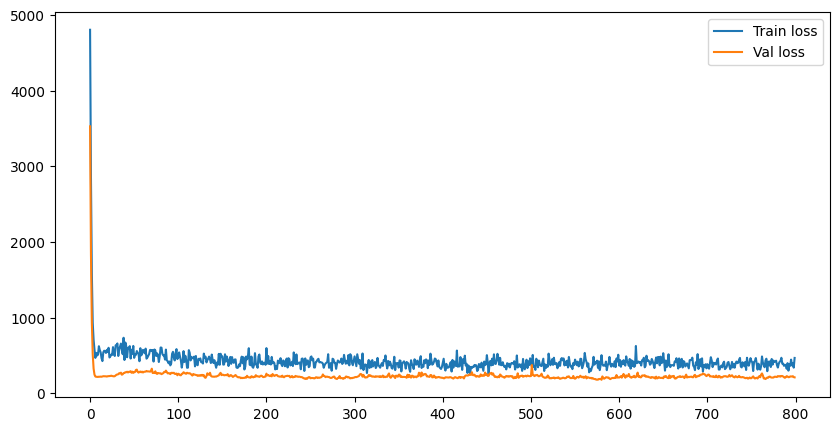

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train loss")
plt.plot(val_loss, label="Val loss")
plt.legend()
plt.show()

In [26]:
model.eval()

output_list, label_list = [], []

with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        inputs, labels = data
        inputs = inputs.unsqueeze(1).to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        output_list.append(outputs)
        label_list.append(labels.item())

        print(f"Loss: {loss:.5f}\t\tPredicted Mean: {torch.mean(outputs)}\t\tActual: {labels.item():.5f}")

Loss: 40.75321		Predicted Mean: 82.39414978027344		Actual: 84.00000
Loss: 61.41879		Predicted Mean: 69.33575439453125		Actual: 67.00000
Loss: 139.05811		Predicted Mean: 69.9884033203125		Actual: 61.00000
Loss: 500.08029		Predicted Mean: 69.98092651367188		Actual: 91.00000
Loss: 158.03369		Predicted Mean: 69.98834228515625		Actual: 60.00000
Loss: 31.33423		Predicted Mean: 72.83732604980469		Actual: 71.00000
Loss: 98.58055		Predicted Mean: 78.97793579101562		Actual: 87.00000
Loss: 61.88219		Predicted Mean: 69.83146667480469		Actual: 68.00000
Loss: 1160.20386		Predicted Mean: 77.5777816772461		Actual: 44.00000
Loss: 83.14989		Predicted Mean: 69.98828887939453		Actual: 65.00000
Loss: 296.72815		Predicted Mean: 73.4293212890625		Actual: 58.00000
Loss: 94.12770		Predicted Mean: 69.9884033203125		Actual: 64.00000
Loss: 90.26062		Predicted Mean: 69.67312622070312		Actual: 64.00000
Loss: 141.34167		Predicted Mean: 76.53036499023438		Actual: 87.00000
Loss: 297.66422		Predicted Mean: 73.389022827

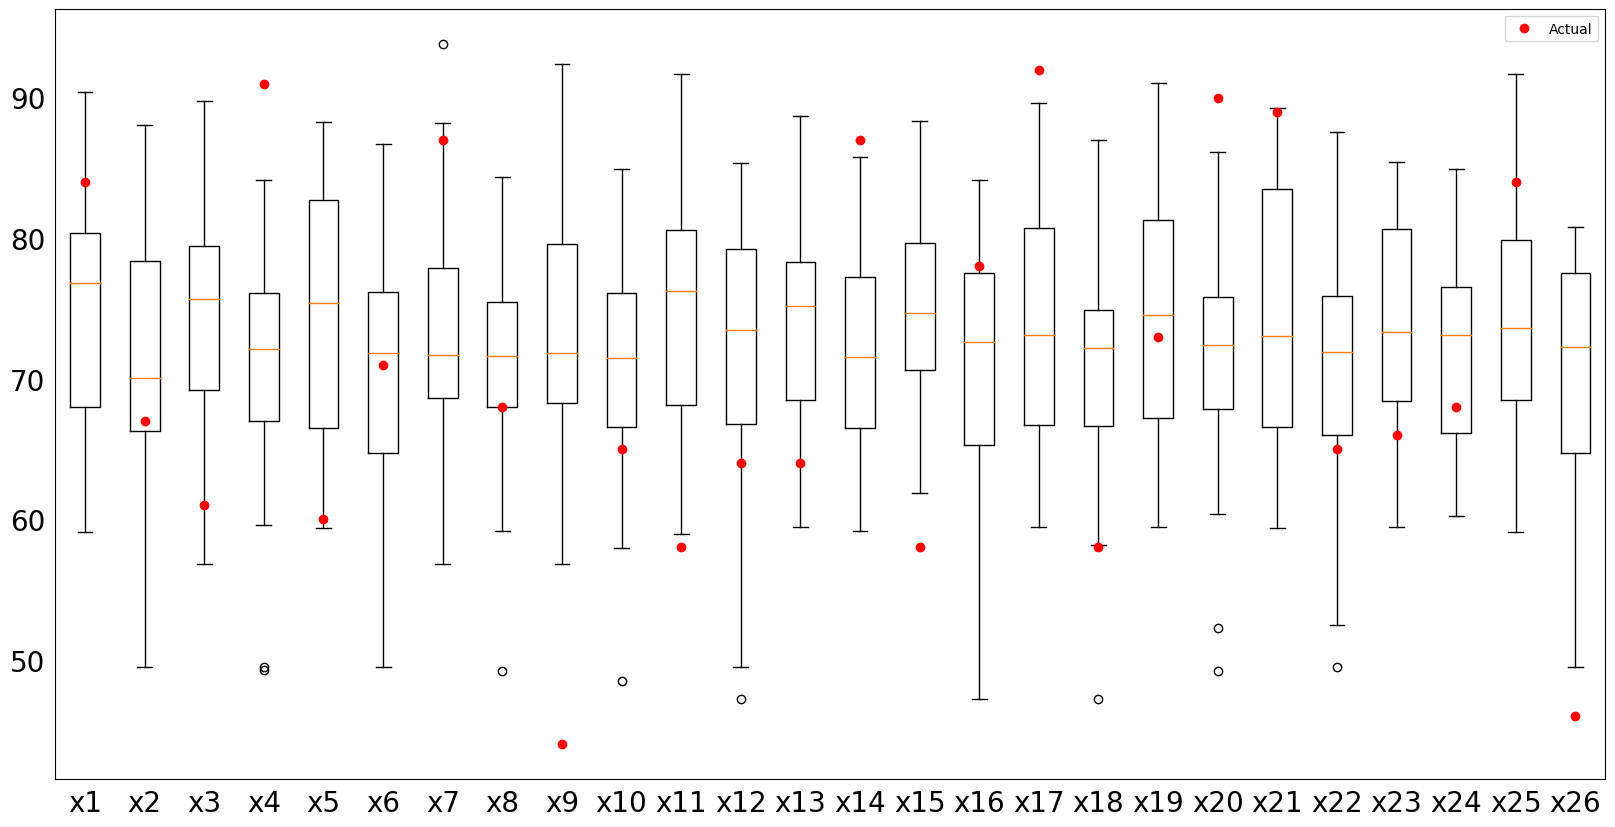

In [27]:
outputs = torch.cat(output_list, dim=0)
labels = torch.tensor(label_list)

fig, ax = plt.subplots(figsize=(20, 10))

# Plot boxplot
boxplot_data = outputs.cpu().numpy().reshape(-1, 26)
ax.boxplot(boxplot_data)

# Plot actual data
actual_data = labels.cpu().numpy()
ax.plot(np.arange(1, len(actual_data) + 1), actual_data, label="Actual", linestyle="None", marker="o", color="red")

# Set x-axis tick labels
xtick_labels = [f'x{i}' for i in range(1, len(actual_data) + 1)]
ax.set_xticks(np.arange(1, len(actual_data) + 1))
ax.set_xticklabels(xtick_labels)

# Other formatting
plt.tick_params(axis='both', which='major', labelsize=20, bottom=False, top=False, left=False, right=False)
plt.legend()
plt.show()
